In [218]:
import matplotlib.pyplot as plt
import wrapper_for_data as wrap
import analysis_for_data as analysis
import exponential_median as exp_median
import noise_addition_for_smooth_sens as ss_median
import binary_search_median as bisearch_median
import fancy_bs_median as fancy_bs
import cdf_median as cdf_median
import bs_cdf_median
import grad_descent_median as gd_median
import publicCI as pub
import run_CI_algs as run_cis
import imp
import common
import numpy as np
import scipy.stats as st

In [ ]:
imp.reload(wrap)
imp.reload(analysis)
imp.reload(common)
imp.reload(run_cis)
imp.reload(exp_median)
imp.reload(cdf_median)
imp.reload(bisearch_median)
imp.reload(bs_cdf_median)

In [201]:
# Common for running/plotting
alg_index = [('Expmedian_naive','ExpMechUnion'), #0
             ('Expmedian','ExpMech'), #1
             ('CDFmedian_naive', 'CDFPostProcessUnion'), #2
             ('CDFmedian', 'CDFPostProcess'), #3
             ('CDFBSmedian', 'CDF+BinSearch'), #4
             ('AdaBSCDFmedian', 'BinSearch+CDF'), #5
             ('BSmedian_sep_reuse_queries', 'BinSearch'), #6
             ('AdaBSmedian_sep', 'NoisyBinSearch'), #7
             ('', 'Nonprivate')] #8

# Eg. set of all algorithms
all_indices = [i for i in range(len(alg_index))]
algs_all = [alg_index[i][0] for i in all_indices[:-1]]
alg_names_all = [alg_index[i][1] for i in all_indices]
print(algs_all)
print(alg_names_all)

# Colors
colors=['magenta',
        'indianred', 
        'orange',
        'pink', 
        'yellow',
        'darkseagreen', 
        'skyblue', 
        'mediumpurple',
        'darkslategray', 
       ]

colors_all = [colors[i] for i in range(len(all_indices))]
print(colors_all)

# Save directory
dir_path = '../../figs'

# The next three functions create save paths
def conf_str(alpha):
    if (type(alpha) is list) or (type(alpha) is np.ndarray):
        return 'alpha'
    else:
        return str(int(100-100*alpha))

def coverage_save_paths(dir_path, dataset_name, param_string, alpha):
    # Coverage for all algs
    save_path1 = '%s/coverage-%s/coverage-%s-%s-all-varying-%s.pdf' % (dir_path, param_string, conf_str(alpha), dataset_name, param_string)
    # COverage for main body algs
    save_path2 = '%s/coverage-%s/coverage-%s-%s-varying-%s.pdf' % (dir_path, param_string, conf_str(alpha), dataset_name, param_string)
    # Coverage for naive vs. new algs
    save_path3 = '%s/coverage-%s/coverage-%s-%s-naive-v-new-varying-%s.pdf' % (dir_path, param_string, conf_str(alpha), dataset_name, param_string)
    save_paths = [save_path1, save_path2, save_path3]
    return save_paths

def width_save_paths(dir_path, dataset_name, param_string, alpha):
    # Relative widths for all algs
    save_path1 = '%s/widths-%s/rel-width-%s-%s-all-varying-%s.pdf' % (dir_path, param_string, conf_str(alpha), dataset_name, param_string)
    save_path2 = '%s/widths-%s/rel-width-boxplots-%s-%s-all-varying-%s.pdf' % (dir_path, param_string, conf_str(alpha), dataset_name, param_string)
    # Widths for all algs
    save_path3 = '%s/widths-%s/width-%s-%s-all-varying-%s.pdf' % (dir_path, param_string, conf_str(alpha), dataset_name, param_string)
    save_path4 = '%s/widths-%s/width-boxplots-%s-%s-all-varying-%s.pdf' % (dir_path, param_string, conf_str(alpha), dataset_name, param_string)
    # Relative widths for main body algs
    save_path5 = '%s/widths-%s/rel-width-%s-%s-varying-%s.pdf' % (dir_path, param_string, conf_str(alpha), dataset_name, param_string)
    save_path6 = '%s/widths-%s/rel-width-boxplots-%s-%s-varying-%s.pdf' % (dir_path, param_string, conf_str(alpha), dataset_name, param_string)    
    # Relative widths for naive vs. new algs
    save_path7 = '%s/widths-%s/rel-width-boxplots-%s-%s-naive-v-new-varying-%s.pdf' % (dir_path, param_string, conf_str(alpha), dataset_name, param_string)
    save_paths = [save_path1, save_path2, save_path3, save_path4, save_path5, save_path6, save_path7]
    return save_paths

['Expmedian_naive', 'Expmedian', 'CDFmedian_naive', 'CDFmedian', 'CDFBSmedian', 'AdaBSCDFmedian', 'BSmedian_sep_reuse_queries', 'AdaBSmedian_sep']
['ExpMechUnion', 'ExpMech', 'CDFPostProcessUnion', 'CDFPostProcess', 'CDF+BinSearch', 'BinSearch+CDF', 'BinSearch', 'NoisyBinSearch', 'Nonprivate']
['magenta', 'indianred', 'orange', 'pink', 'yellow', 'darkseagreen', 'skyblue', 'mediumpurple', 'darkslategray']


##  Baseline lognormal data 

In [111]:
# Baseline data for widths 
# Only use this data when parameter is not part of data!
# Otherwise, use lognormal_v1 for n and lognormal_v2 for data_scale)
dataset_name='lognormal_v0'
data_center = 0.5
data_scale = 1.0
n = int(1000)
num_datasets = 1000

for j in range(num_datasets):
    dataset = np.array(st.lognorm.rvs(data_scale, loc=data_center, size=n))
    save_path = 'data/%s_%s.npy' % (dataset_name, str(j))
    np.save(save_path, dataset)
    
true_median = st.lognorm.median(data_scale, loc=data_center)
print(true_median)

1.5


In [ ]:
# Baseline data for coverage 
# Do not use this data for widths!
dataset_name='lognormal_cov'
data_center = 0.5
data_scale = 1.0
n = int(1000)
num_datasets = 1000 # 1000 datasets to reduce Monte Carlo error

for j in range(num_datasets):
    dataset = np.array(st.lognorm.rvs(data_scale, loc=data_center, size=n))
    save_path = 'data/%s_%s.npy' % (dataset_name, str(j))
    np.save(save_path, dataset)
    
true_median = st.lognorm.median(data_scale, loc=data_center)
print(true_median)

# Some coverage plots use flatter dist
# May use this data to compare on widths
dataset_name='lognormal_flat'
data_center = 0.5
data_scale = 5.0
n = int(1000)
num_datasets = 1000

for j in range(num_datasets):
    dataset = np.array(st.lognorm.rvs(data_scale, loc=data_center, size=n))
    print(np.median(dataset))
    save_path = 'data/%s_%s.npy' % (dataset_name, str(j))
    np.save(save_path, dataset)
    
true_median = st.lognorm.median(data_scale, loc=data_center)
plt.hist(dataset)
print(true_median)

# Coverage - varying beta

In [165]:
num_trials = 5
range_center = 5
range_scale = 10 
rho = 1.0
alpha = 0.2
beta = 0.01
quantile = 0.5
granularity = 0.05
em_granularity = 0.005

dataset_name='lognormal_cov'
n = 1000
num_datasets = 1000 
data_center = 0.5
data_scale = 1.0
true_median = st.lognorm.median(data_scale, loc=data_center)

beta = [0.01, 0.05, 0.09, 0.13, 0.17]
num_params = len(beta)
param_string='beta'
print(param_string, beta)

beta [0.01, 0.05, 0.09, 0.13, 0.17]


In [ ]:
imp.reload(run_cis)
imp.reload(wrap)
imp.reload(analysis)

run_indices = [0, 1]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_cis.runCIAlgs(dataset_name, num_datasets=num_datasets, num_trials=num_trials, num_params=num_params, 
                  param_string=param_string, 
                  rho=rho, range_center=range_center, range_scale=range_scale, true_median=true_median, 
                  alpha=alpha, beta=beta, 
                  quantile=quantile, n=n, em_granularity=em_granularity, granularity=granularity,
                  alg_list=algs, rerun_algs=True, gen_preprocess=False)

['Expmedian_naive', 'Expmedian', 'CDFmedian_naive', 'CDFmedian', 'CDFBSmedian', 'AdaBSCDFmedian', 'BSmedian_sep_reuse_queries', 'AdaBSmedian_sep']
['ExpMechNaive', 'ExpMech', 'CDFPostProcessNaive', 'CDFPostProcess', 'CDF+BinSearch', 'BinSearch+CDF', 'BinSearch', 'NoisyBinSearch', 'Nonprivate CI']
['Expmedian', 'CDFmedian', 'AdaBSCDFmedian', 'AdaBSmedian_sep']
['ExpMech', 'CDFPostProcess', 'BinSearch+CDF', 'NoisyBinSearch', 'Nonprivate CI']
Nonpriv path: analysis/lognormal_cov_sizes_Expmedian_beta_0.npy
Nonpriv path: analysis/lognormal_cov_sizes_Expmedian_beta_1.npy
Nonpriv path: analysis/lognormal_cov_sizes_Expmedian_beta_2.npy
Nonpriv path: analysis/lognormal_cov_sizes_Expmedian_beta_3.npy
Nonpriv path: analysis/lognormal_cov_sizes_Expmedian_beta_4.npy
0 ExpMech
1 CDFPostProcess
2 BinSearch+CDF
3 NoisyBinSearch
4 Nonprivate CI


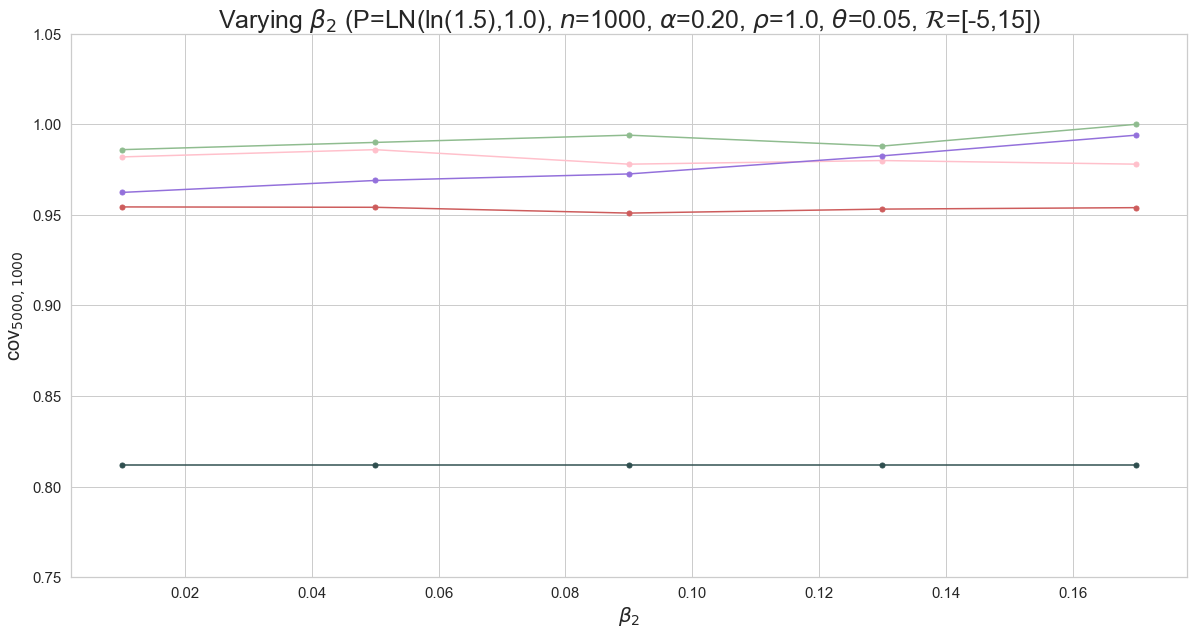

In [170]:
imp.reload(analysis)

run_indices = [0, 1, 2, 3, 4, 5, 6, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [0, 1, 2, 3, 4, 5, 6, 7, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
alg_colors = [colors[i] for i in run_indices_names]
print(alg_names)
title = r"Varying $\beta_2$ (P=LN(ln(%.1f),%.1f), $n$=%s, $\alpha$=%.2f, $\rho$=%s, $\theta$=%.2f, $\mathcal{R}$=[%s,%s])" % (true_median, data_scale, n, alpha, rho, granularity, range_center-range_scale, range_center+range_scale)
xlabel = r"$\beta_2$"
save_paths = coverage_save_paths(dir_path, dataset_name, param_string, alpha)

# save_path = save_paths[0] #'%s/coverage-%s/coverage-%s-%s-all-varying-%s.pdf' % (dir_path, param_string, conf_str(alpha), dataset_name, param_string)
# plt = analysis.plotCIs(algs, dataset_name, title, beta, xlabel, 
#           alg_names, param_string=param_string, ratio=False, alpha=alpha, T=num_trials*num_datasets, n=n,
#           log=False, legend_out=False, xlim=None, ylim=[0.75, 1.05], sort='byParam', coverage=True, 
#             save=True, save_path=save_path, colors=alg_colors)

run_indices = [1, 3, 5, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [1, 3, 5, 7, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
alg_colors = [colors[i] for i in run_indices_names]
print(alg_names)
# save_path = '%s/coverage-%s/coverage-%s-%s-varying-%s.pdf' % (dir_path, param_string, conf_str(alpha), dataset_name, param_string)

save_path = save_paths[1]
plt = analysis.plotCIs(algs, dataset_name, title, beta, xlabel, 
          alg_names, param_string='beta', ratio=False, alpha=alpha, T=num_trials*num_datasets, n=n,
          log=False, legend=False, legend_out=False, xlim=None, ylim=[0.75, 1.05], sort='byParam', coverage=True, 
            save=True, save_path=save_path, colors=alg_colors)

# Coverage - varying rho

In [179]:
dataset_name='lognormal_flat'
num_datasets = 1000
n = 1000
data_center = 0.5
data_scale = 5.0
true_median = st.lognorm.median(data_scale, loc=data_center)
print("true median:", true_median)

num_trials = 20
range_center = 5
range_scale = 10
rho = 1.0
alpha = 0.2
beta = 0.01
quantile = 0.5
granularity = 0.01
em_granularity = 0.005

rho = [0.01, 0.1, 1.0, 10.0]
num_params = len(rho)
print(rho)
print(granularity)
param_string='rho'

true median: 1.5
[0.01, 0.1, 1.0, 10.0]
0.01


In [186]:
imp.reload(run_cis)
imp.reload(cdf_median)
imp.reload(wrap)
imp.reload(analysis)

run_indices = [1]
algs = [alg_index[i][0] for i in run_indices]
print(algs)

run_cis.runCIAlgs(dataset_name, num_datasets=num_datasets, num_trials=num_trials, num_params=num_params, 
                  param_string=param_string, 
                  rho=rho, range_center=range_center, range_scale=range_scale, true_median=true_median, 
                  alpha=alpha, beta=beta, 
                  quantile=quantile, n=n, em_granularity=em_granularity, granularity=granularity,
                  alg_list=algs, rerun_algs=True, gen_preprocess=False)

['Expmedian']
starting EM
param 0 of 4
Computing coefficients
Finished computing coefficients
n: 1000
Searching for lower quantile
i: 500
Searching for upper quantile
i: 1000
n 1000 lb, ub -5 15 gran 0.01 alpha 0.2 rho 0.01
name, hyperparameters Expmedian_rho_0 {'em_granularity': 0.005, 'granularity': 0.01, 'beta': 0.01, 'alpha': 0.2, 'cdp': True, 'em_lower_quantile': 0.389, 'em_upper_quantile': 0.61}
computing 80% CIs
dataset 0 of 1000 lognormal_flat lognormal_flat_n_3_53.npy
dataset 1 of 1000 lognormal_flat lognormal_flat_479.npy
dataset 2 of 1000 lognormal_flat lognormal_flat_n_3_47.npy
dataset 3 of 1000 lognormal_flat lognormal_flat_n_4_66.npy
dataset 4 of 1000 lognormal_flat lognormal_flat_323.npy
dataset 5 of 1000 lognormal_flat lognormal_flat_445.npy
dataset 6 of 1000 lognormal_flat lognormal_flat_451.npy
dataset 7 of 1000 lognormal_flat lognormal_flat_337.npy
dataset 8 of 1000 lognormal_flat lognormal_flat_n_4_72.npy
dataset 9 of 1000 lognormal_flat lognormal_flat_n_4_99.npy
da

dataset 134 of 1000 lognormal_flat lognormal_flat_254.npy
dataset 135 of 1000 lognormal_flat lognormal_flat_n_1_69.npy
dataset 136 of 1000 lognormal_flat lognormal_flat_n_1_82.npy
dataset 137 of 1000 lognormal_flat lognormal_flat_n_1_96.npy
dataset 138 of 1000 lognormal_flat lognormal_flat_283.npy
dataset 139 of 1000 lognormal_flat lognormal_flat_n_1_8.npy
dataset 140 of 1000 lognormal_flat lognormal_flat_297.npy
dataset 141 of 1000 lognormal_flat lognormal_flat_296.npy
dataset 142 of 1000 lognormal_flat lognormal_flat_282.npy
dataset 143 of 1000 lognormal_flat lognormal_flat_n_1_9.npy
dataset 144 of 1000 lognormal_flat lognormal_flat_n_1_97.npy
dataset 145 of 1000 lognormal_flat lognormal_flat_n_1_83.npy
dataset 146 of 1000 lognormal_flat lognormal_flat_533.npy
dataset 147 of 1000 lognormal_flat lognormal_flat_n_1_68.npy
dataset 148 of 1000 lognormal_flat lognormal_flat_255.npy
dataset 149 of 1000 lognormal_flat lognormal_flat_241.npy
dataset 150 of 1000 lognormal_flat lognormal_flat_

dataset 279 of 1000 lognormal_flat lognormal_flat_324.npy
dataset 280 of 1000 lognormal_flat lognormal_flat_n_4_61.npy
dataset 281 of 1000 lognormal_flat lognormal_flat_n_3_68.npy
dataset 282 of 1000 lognormal_flat lognormal_flat_442.npy
dataset 283 of 1000 lognormal_flat lognormal_flat_456.npy
dataset 284 of 1000 lognormal_flat lognormal_flat_n_4_75.npy
dataset 285 of 1000 lognormal_flat lognormal_flat_330.npy
dataset 286 of 1000 lognormal_flat lognormal_flat_440.npy
dataset 287 of 1000 lognormal_flat lognormal_flat_n_4_63.npy
dataset 288 of 1000 lognormal_flat lognormal_flat_326.npy
dataset 289 of 1000 lognormal_flat lognormal_flat_332.npy
dataset 290 of 1000 lognormal_flat lognormal_flat_n_4_77.npy
dataset 291 of 1000 lognormal_flat lognormal_flat_454.npy
dataset 292 of 1000 lognormal_flat lognormal_flat_n_3_56.npy
dataset 293 of 1000 lognormal_flat lognormal_flat_468.npy
dataset 294 of 1000 lognormal_flat lognormal_flat_n_3_42.npy
dataset 295 of 1000 lognormal_flat lognormal_flat_4

dataset 429 of 1000 lognormal_flat lognormal_flat_553.npy
dataset 430 of 1000 lognormal_flat lognormal_flat_235.npy
dataset 431 of 1000 lognormal_flat lognormal_flat_73.npy
dataset 432 of 1000 lognormal_flat lognormal_flat_n_1_20.npy
dataset 433 of 1000 lognormal_flat lognormal_flat_n_1_34.npy
dataset 434 of 1000 lognormal_flat lognormal_flat_209.npy
dataset 435 of 1000 lognormal_flat lognormal_flat_67.npy
dataset 436 of 1000 lognormal_flat lognormal_flat_786.npy
dataset 437 of 1000 lognormal_flat lognormal_flat_792.npy
dataset 438 of 1000 lognormal_flat lognormal_flat_962.npy
dataset 439 of 1000 lognormal_flat lognormal_flat_976.npy
dataset 440 of 1000 lognormal_flat lognormal_flat_745.npy
dataset 441 of 1000 lognormal_flat lognormal_flat_n_2_71.npy
dataset 442 of 1000 lognormal_flat lognormal_flat_n_2_65.npy
dataset 443 of 1000 lognormal_flat lognormal_flat_989.npy
dataset 444 of 1000 lognormal_flat lognormal_flat_751.npy
dataset 445 of 1000 lognormal_flat lognormal_flat_779.npy
data

dataset 574 of 1000 lognormal_flat lognormal_flat_636.npy
dataset 575 of 1000 lognormal_flat lognormal_flat_n_0_73.npy
dataset 576 of 1000 lognormal_flat lognormal_flat_150.npy
dataset 577 of 1000 lognormal_flat lognormal_flat_n_0_67.npy
dataset 578 of 1000 lognormal_flat lognormal_flat_144.npy
dataset 579 of 1000 lognormal_flat lognormal_flat_622.npy
dataset 580 of 1000 lognormal_flat lognormal_flat_178.npy
dataset 581 of 1000 lognormal_flat lognormal_flat_193.npy
dataset 582 of 1000 lognormal_flat lognormal_flat_187.npy
dataset 583 of 1000 lognormal_flat lognormal_flat_839.npy
dataset 584 of 1000 lognormal_flat lognormal_flat_811.npy
dataset 585 of 1000 lognormal_flat lognormal_flat_n_0_98.npy
dataset 586 of 1000 lognormal_flat lognormal_flat_805.npy
dataset 587 of 1000 lognormal_flat lognormal_flat_n_2_76.npy
dataset 588 of 1000 lognormal_flat lognormal_flat_742.npy
dataset 589 of 1000 lognormal_flat lognormal_flat_756.npy
dataset 590 of 1000 lognormal_flat lognormal_flat_n_2_62.npy

dataset 723 of 1000 lognormal_flat lognormal_flat_740.npy
dataset 724 of 1000 lognormal_flat lognormal_flat_n_2_74.npy
dataset 725 of 1000 lognormal_flat lognormal_flat_n_2_60.npy
dataset 726 of 1000 lognormal_flat lognormal_flat_754.npy
dataset 727 of 1000 lognormal_flat lognormal_flat_813.npy
dataset 728 of 1000 lognormal_flat lognormal_flat_807.npy
dataset 729 of 1000 lognormal_flat lognormal_flat_191.npy
dataset 730 of 1000 lognormal_flat lognormal_flat_185.npy
dataset 731 of 1000 lognormal_flat lognormal_flat_608.npy
dataset 732 of 1000 lognormal_flat lognormal_flat_n_0_59.npy
dataset 733 of 1000 lognormal_flat lognormal_flat_152.npy
dataset 734 of 1000 lognormal_flat lognormal_flat_n_0_71.npy
dataset 735 of 1000 lognormal_flat lognormal_flat_634.npy
dataset 736 of 1000 lognormal_flat lognormal_flat_620.npy
dataset 737 of 1000 lognormal_flat lognormal_flat_146.npy
dataset 738 of 1000 lognormal_flat lognormal_flat_n_0_65.npy
dataset 739 of 1000 lognormal_flat lognormal_flat_393.npy

dataset 869 of 1000 lognormal_flat lognormal_flat_821.npy
dataset 870 of 1000 lognormal_flat lognormal_flat_n_0_94.npy
dataset 871 of 1000 lognormal_flat lognormal_flat_809.npy
dataset 872 of 1000 lognormal_flat lognormal_flat_n_0_80.npy
dataset 873 of 1000 lognormal_flat lognormal_flat_982.npy
dataset 874 of 1000 lognormal_flat lognormal_flat_996.npy
dataset 875 of 1000 lognormal_flat lognormal_flat_766.npy
dataset 876 of 1000 lognormal_flat lognormal_flat_n_2_52.npy
dataset 877 of 1000 lognormal_flat lognormal_flat_n_2_46.npy
dataset 878 of 1000 lognormal_flat lognormal_flat_772.npy
dataset 879 of 1000 lognormal_flat lognormal_flat_941.npy
dataset 880 of 1000 lognormal_flat lognormal_flat_799.npy
dataset 881 of 1000 lognormal_flat lognormal_flat_955.npy
dataset 882 of 1000 lognormal_flat lognormal_flat_n_4_6.npy
dataset 883 of 1000 lognormal_flat lognormal_flat_n_2_91.npy
dataset 884 of 1000 lognormal_flat lognormal_flat_969.npy
dataset 885 of 1000 lognormal_flat lognormal_flat_n_2_8

dataset 8 of 1000 lognormal_flat lognormal_flat_n_4_72.npy
dataset 9 of 1000 lognormal_flat lognormal_flat_n_4_99.npy
dataset 10 of 1000 lognormal_flat lognormal_flat_n_3_90.npy
dataset 11 of 1000 lognormal_flat lognormal_flat_n_3_84.npy
dataset 12 of 1000 lognormal_flat lognormal_flat_486.npy
dataset 13 of 1000 lognormal_flat lognormal_flat_492.npy
dataset 14 of 1000 lognormal_flat lognormal_flat_109.npy
dataset 15 of 1000 lognormal_flat lognormal_flat_647.npy
dataset 16 of 1000 lognormal_flat lognormal_flat_121.npy
dataset 17 of 1000 lognormal_flat lognormal_flat_135.npy
dataset 18 of 1000 lognormal_flat lognormal_flat_n_0_16.npy
dataset 19 of 1000 lognormal_flat lognormal_flat_653.npy
dataset 20 of 1000 lognormal_flat lognormal_flat_0.npy
dataset 21 of 1000 lognormal_flat lognormal_flat_860.npy
dataset 22 of 1000 lognormal_flat lognormal_flat_874.npy
dataset 23 of 1000 lognormal_flat lognormal_flat_684.npy
dataset 24 of 1000 lognormal_flat lognormal_flat_690.npy
dataset 25 of 1000 l

dataset 155 of 1000 lognormal_flat lognormal_flat_916.npy
dataset 156 of 1000 lognormal_flat lognormal_flat_902.npy
dataset 157 of 1000 lognormal_flat lognormal_flat_731.npy
dataset 158 of 1000 lognormal_flat lognormal_flat_n_2_11.npy
dataset 159 of 1000 lognormal_flat lognormal_flat_725.npy
dataset 160 of 1000 lognormal_flat lognormal_flat_n_2_39.npy
dataset 161 of 1000 lognormal_flat lognormal_flat_719.npy
dataset 162 of 1000 lognormal_flat lognormal_flat_686.npy
dataset 163 of 1000 lognormal_flat lognormal_flat_692.npy
dataset 164 of 1000 lognormal_flat lognormal_flat_862.npy
dataset 165 of 1000 lognormal_flat lognormal_flat_2.npy
dataset 166 of 1000 lognormal_flat lognormal_flat_876.npy
dataset 167 of 1000 lognormal_flat lognormal_flat_123.npy
dataset 168 of 1000 lognormal_flat lognormal_flat_645.npy
dataset 169 of 1000 lognormal_flat lognormal_flat_651.npy
dataset 170 of 1000 lognormal_flat lognormal_flat_889.npy
dataset 171 of 1000 lognormal_flat lognormal_flat_n_0_14.npy
dataset

dataset 297 of 1000 lognormal_flat lognormal_flat_n_3_95.npy
dataset 298 of 1000 lognormal_flat lognormal_flat_n_4_88.npy
dataset 299 of 1000 lognormal_flat lognormal_flat_n_3_81.npy
dataset 300 of 1000 lognormal_flat lognormal_flat_124.npy
dataset 301 of 1000 lognormal_flat lognormal_flat_642.npy
dataset 302 of 1000 lognormal_flat lognormal_flat_656.npy
dataset 303 of 1000 lognormal_flat lognormal_flat_n_0_13.npy
dataset 304 of 1000 lognormal_flat lognormal_flat_130.npy
dataset 305 of 1000 lognormal_flat lognormal_flat_118.npy
dataset 306 of 1000 lognormal_flat lognormal_flat_681.npy
dataset 307 of 1000 lognormal_flat lognormal_flat_859.npy
dataset 308 of 1000 lognormal_flat lognormal_flat_695.npy
dataset 309 of 1000 lognormal_flat lognormal_flat_865.npy
dataset 310 of 1000 lognormal_flat lognormal_flat_5.npy
dataset 311 of 1000 lognormal_flat lognormal_flat_871.npy
dataset 312 of 1000 lognormal_flat lognormal_flat_736.npy
dataset 313 of 1000 lognormal_flat lognormal_flat_722.npy
data

dataset 443 of 1000 lognormal_flat lognormal_flat_989.npy
dataset 444 of 1000 lognormal_flat lognormal_flat_751.npy
dataset 445 of 1000 lognormal_flat lognormal_flat_779.npy
dataset 446 of 1000 lognormal_flat lognormal_flat_n_2_59.npy
dataset 447 of 1000 lognormal_flat lognormal_flat_194.npy
dataset 448 of 1000 lognormal_flat lognormal_flat_180.npy
dataset 449 of 1000 lognormal_flat lognormal_flat_816.npy
dataset 450 of 1000 lognormal_flat lognormal_flat_802.npy
dataset 451 of 1000 lognormal_flat lognormal_flat_631.npy
dataset 452 of 1000 lognormal_flat lognormal_flat_n_0_74.npy
dataset 453 of 1000 lognormal_flat lognormal_flat_157.npy
dataset 454 of 1000 lognormal_flat lognormal_flat_n_0_60.npy
dataset 455 of 1000 lognormal_flat lognormal_flat_143.npy
dataset 456 of 1000 lognormal_flat lognormal_flat_625.npy
dataset 457 of 1000 lognormal_flat lognormal_flat_n_0_48.npy
dataset 458 of 1000 lognormal_flat lognormal_flat_619.npy
dataset 459 of 1000 lognormal_flat lognormal_flat_396.npy
da

dataset 589 of 1000 lognormal_flat lognormal_flat_756.npy
dataset 590 of 1000 lognormal_flat lognormal_flat_n_2_62.npy
dataset 591 of 1000 lognormal_flat lognormal_flat_959.npy
dataset 592 of 1000 lognormal_flat lognormal_flat_781.npy
dataset 593 of 1000 lognormal_flat lognormal_flat_795.npy
dataset 594 of 1000 lognormal_flat lognormal_flat_n_2_89.npy
dataset 595 of 1000 lognormal_flat lognormal_flat_965.npy
dataset 596 of 1000 lognormal_flat lognormal_flat_971.npy
dataset 597 of 1000 lognormal_flat lognormal_flat_48.npy
dataset 598 of 1000 lognormal_flat lognormal_flat_226.npy
dataset 599 of 1000 lognormal_flat lognormal_flat_540.npy
dataset 600 of 1000 lognormal_flat lognormal_flat_554.npy
dataset 601 of 1000 lognormal_flat lognormal_flat_232.npy
dataset 602 of 1000 lognormal_flat lognormal_flat_n_1_27.npy
dataset 603 of 1000 lognormal_flat lognormal_flat_74.npy
dataset 604 of 1000 lognormal_flat lognormal_flat_568.npy
dataset 605 of 1000 lognormal_flat lognormal_flat_60.npy
dataset 

dataset 732 of 1000 lognormal_flat lognormal_flat_n_0_59.npy
dataset 733 of 1000 lognormal_flat lognormal_flat_152.npy
dataset 734 of 1000 lognormal_flat lognormal_flat_n_0_71.npy
dataset 735 of 1000 lognormal_flat lognormal_flat_634.npy
dataset 736 of 1000 lognormal_flat lognormal_flat_620.npy
dataset 737 of 1000 lognormal_flat lognormal_flat_146.npy
dataset 738 of 1000 lognormal_flat lognormal_flat_n_0_65.npy
dataset 739 of 1000 lognormal_flat lognormal_flat_393.npy
dataset 740 of 1000 lognormal_flat lognormal_flat_387.npy
dataset 741 of 1000 lognormal_flat lognormal_flat_n_3_20.npy
dataset 742 of 1000 lognormal_flat lognormal_flat_n_4_29.npy
dataset 743 of 1000 lognormal_flat lognormal_flat_378.npy
dataset 744 of 1000 lognormal_flat lognormal_flat_n_3_34.npy
dataset 745 of 1000 lognormal_flat lognormal_flat_436.npy
dataset 746 of 1000 lognormal_flat lognormal_flat_350.npy
dataset 747 of 1000 lognormal_flat lognormal_flat_n_4_15.npy
dataset 748 of 1000 lognormal_flat lognormal_flat_3

dataset 874 of 1000 lognormal_flat lognormal_flat_996.npy
dataset 875 of 1000 lognormal_flat lognormal_flat_766.npy
dataset 876 of 1000 lognormal_flat lognormal_flat_n_2_52.npy
dataset 877 of 1000 lognormal_flat lognormal_flat_n_2_46.npy
dataset 878 of 1000 lognormal_flat lognormal_flat_772.npy
dataset 879 of 1000 lognormal_flat lognormal_flat_941.npy
dataset 880 of 1000 lognormal_flat lognormal_flat_799.npy
dataset 881 of 1000 lognormal_flat lognormal_flat_955.npy
dataset 882 of 1000 lognormal_flat lognormal_flat_n_4_6.npy
dataset 883 of 1000 lognormal_flat lognormal_flat_n_2_91.npy
dataset 884 of 1000 lognormal_flat lognormal_flat_969.npy
dataset 885 of 1000 lognormal_flat lognormal_flat_n_2_85.npy
dataset 886 of 1000 lognormal_flat lognormal_flat_558.npy
dataset 887 of 1000 lognormal_flat lognormal_flat_50.npy
dataset 888 of 1000 lognormal_flat lognormal_flat_n_1_17.npy
dataset 889 of 1000 lognormal_flat lognormal_flat_44.npy
dataset 890 of 1000 lognormal_flat lognormal_flat_564.npy

dataset 8 of 1000 lognormal_flat lognormal_flat_n_4_72.npy
dataset 9 of 1000 lognormal_flat lognormal_flat_n_4_99.npy
dataset 10 of 1000 lognormal_flat lognormal_flat_n_3_90.npy
dataset 11 of 1000 lognormal_flat lognormal_flat_n_3_84.npy
dataset 12 of 1000 lognormal_flat lognormal_flat_486.npy
dataset 13 of 1000 lognormal_flat lognormal_flat_492.npy
dataset 14 of 1000 lognormal_flat lognormal_flat_109.npy
dataset 15 of 1000 lognormal_flat lognormal_flat_647.npy
dataset 16 of 1000 lognormal_flat lognormal_flat_121.npy
dataset 17 of 1000 lognormal_flat lognormal_flat_135.npy
dataset 18 of 1000 lognormal_flat lognormal_flat_n_0_16.npy
dataset 19 of 1000 lognormal_flat lognormal_flat_653.npy
dataset 20 of 1000 lognormal_flat lognormal_flat_0.npy
dataset 21 of 1000 lognormal_flat lognormal_flat_860.npy
dataset 22 of 1000 lognormal_flat lognormal_flat_874.npy
dataset 23 of 1000 lognormal_flat lognormal_flat_684.npy
dataset 24 of 1000 lognormal_flat lognormal_flat_690.npy
dataset 25 of 1000 l

dataset 149 of 1000 lognormal_flat lognormal_flat_241.npy
dataset 150 of 1000 lognormal_flat lognormal_flat_527.npy
dataset 151 of 1000 lognormal_flat lognormal_flat_n_1_54.npy
dataset 152 of 1000 lognormal_flat lognormal_flat_269.npy
dataset 153 of 1000 lognormal_flat lognormal_flat_n_1_40.npy
dataset 154 of 1000 lognormal_flat lognormal_flat_13.npy
dataset 155 of 1000 lognormal_flat lognormal_flat_916.npy
dataset 156 of 1000 lognormal_flat lognormal_flat_902.npy
dataset 157 of 1000 lognormal_flat lognormal_flat_731.npy
dataset 158 of 1000 lognormal_flat lognormal_flat_n_2_11.npy
dataset 159 of 1000 lognormal_flat lognormal_flat_725.npy
dataset 160 of 1000 lognormal_flat lognormal_flat_n_2_39.npy
dataset 161 of 1000 lognormal_flat lognormal_flat_719.npy
dataset 162 of 1000 lognormal_flat lognormal_flat_686.npy
dataset 163 of 1000 lognormal_flat lognormal_flat_692.npy
dataset 164 of 1000 lognormal_flat lognormal_flat_862.npy
dataset 165 of 1000 lognormal_flat lognormal_flat_2.npy
datas

dataset 291 of 1000 lognormal_flat lognormal_flat_454.npy
dataset 292 of 1000 lognormal_flat lognormal_flat_n_3_56.npy
dataset 293 of 1000 lognormal_flat lognormal_flat_468.npy
dataset 294 of 1000 lognormal_flat lognormal_flat_n_3_42.npy
dataset 295 of 1000 lognormal_flat lognormal_flat_483.npy
dataset 296 of 1000 lognormal_flat lognormal_flat_497.npy
dataset 297 of 1000 lognormal_flat lognormal_flat_n_3_95.npy
dataset 298 of 1000 lognormal_flat lognormal_flat_n_4_88.npy
dataset 299 of 1000 lognormal_flat lognormal_flat_n_3_81.npy
dataset 300 of 1000 lognormal_flat lognormal_flat_124.npy
dataset 301 of 1000 lognormal_flat lognormal_flat_642.npy
dataset 302 of 1000 lognormal_flat lognormal_flat_656.npy
dataset 303 of 1000 lognormal_flat lognormal_flat_n_0_13.npy
dataset 304 of 1000 lognormal_flat lognormal_flat_130.npy
dataset 305 of 1000 lognormal_flat lognormal_flat_118.npy
dataset 306 of 1000 lognormal_flat lognormal_flat_681.npy
dataset 307 of 1000 lognormal_flat lognormal_flat_859.

dataset 435 of 1000 lognormal_flat lognormal_flat_67.npy
dataset 436 of 1000 lognormal_flat lognormal_flat_786.npy
dataset 437 of 1000 lognormal_flat lognormal_flat_792.npy
dataset 438 of 1000 lognormal_flat lognormal_flat_962.npy
dataset 439 of 1000 lognormal_flat lognormal_flat_976.npy
dataset 440 of 1000 lognormal_flat lognormal_flat_745.npy
dataset 441 of 1000 lognormal_flat lognormal_flat_n_2_71.npy
dataset 442 of 1000 lognormal_flat lognormal_flat_n_2_65.npy
dataset 443 of 1000 lognormal_flat lognormal_flat_989.npy
dataset 444 of 1000 lognormal_flat lognormal_flat_751.npy
dataset 445 of 1000 lognormal_flat lognormal_flat_779.npy
dataset 446 of 1000 lognormal_flat lognormal_flat_n_2_59.npy
dataset 447 of 1000 lognormal_flat lognormal_flat_194.npy
dataset 448 of 1000 lognormal_flat lognormal_flat_180.npy
dataset 449 of 1000 lognormal_flat lognormal_flat_816.npy
dataset 450 of 1000 lognormal_flat lognormal_flat_802.npy
dataset 451 of 1000 lognormal_flat lognormal_flat_631.npy
datase

dataset 584 of 1000 lognormal_flat lognormal_flat_811.npy
dataset 585 of 1000 lognormal_flat lognormal_flat_n_0_98.npy
dataset 586 of 1000 lognormal_flat lognormal_flat_805.npy
dataset 587 of 1000 lognormal_flat lognormal_flat_n_2_76.npy
dataset 588 of 1000 lognormal_flat lognormal_flat_742.npy
dataset 589 of 1000 lognormal_flat lognormal_flat_756.npy
dataset 590 of 1000 lognormal_flat lognormal_flat_n_2_62.npy
dataset 591 of 1000 lognormal_flat lognormal_flat_959.npy
dataset 592 of 1000 lognormal_flat lognormal_flat_781.npy
dataset 593 of 1000 lognormal_flat lognormal_flat_795.npy
dataset 594 of 1000 lognormal_flat lognormal_flat_n_2_89.npy
dataset 595 of 1000 lognormal_flat lognormal_flat_965.npy
dataset 596 of 1000 lognormal_flat lognormal_flat_971.npy
dataset 597 of 1000 lognormal_flat lognormal_flat_48.npy
dataset 598 of 1000 lognormal_flat lognormal_flat_226.npy
dataset 599 of 1000 lognormal_flat lognormal_flat_540.npy
dataset 600 of 1000 lognormal_flat lognormal_flat_554.npy
dat

dataset 726 of 1000 lognormal_flat lognormal_flat_754.npy
dataset 727 of 1000 lognormal_flat lognormal_flat_813.npy
dataset 728 of 1000 lognormal_flat lognormal_flat_807.npy
dataset 729 of 1000 lognormal_flat lognormal_flat_191.npy
dataset 730 of 1000 lognormal_flat lognormal_flat_185.npy
dataset 731 of 1000 lognormal_flat lognormal_flat_608.npy
dataset 732 of 1000 lognormal_flat lognormal_flat_n_0_59.npy
dataset 733 of 1000 lognormal_flat lognormal_flat_152.npy
dataset 734 of 1000 lognormal_flat lognormal_flat_n_0_71.npy
dataset 735 of 1000 lognormal_flat lognormal_flat_634.npy
dataset 736 of 1000 lognormal_flat lognormal_flat_620.npy
dataset 737 of 1000 lognormal_flat lognormal_flat_146.npy
dataset 738 of 1000 lognormal_flat lognormal_flat_n_0_65.npy
dataset 739 of 1000 lognormal_flat lognormal_flat_393.npy
dataset 740 of 1000 lognormal_flat lognormal_flat_387.npy
dataset 741 of 1000 lognormal_flat lognormal_flat_n_3_20.npy
dataset 742 of 1000 lognormal_flat lognormal_flat_n_4_29.npy

dataset 870 of 1000 lognormal_flat lognormal_flat_n_0_94.npy
dataset 871 of 1000 lognormal_flat lognormal_flat_809.npy
dataset 872 of 1000 lognormal_flat lognormal_flat_n_0_80.npy
dataset 873 of 1000 lognormal_flat lognormal_flat_982.npy
dataset 874 of 1000 lognormal_flat lognormal_flat_996.npy
dataset 875 of 1000 lognormal_flat lognormal_flat_766.npy
dataset 876 of 1000 lognormal_flat lognormal_flat_n_2_52.npy
dataset 877 of 1000 lognormal_flat lognormal_flat_n_2_46.npy
dataset 878 of 1000 lognormal_flat lognormal_flat_772.npy
dataset 879 of 1000 lognormal_flat lognormal_flat_941.npy
dataset 880 of 1000 lognormal_flat lognormal_flat_799.npy
dataset 881 of 1000 lognormal_flat lognormal_flat_955.npy
dataset 882 of 1000 lognormal_flat lognormal_flat_n_4_6.npy
dataset 883 of 1000 lognormal_flat lognormal_flat_n_2_91.npy
dataset 884 of 1000 lognormal_flat lognormal_flat_969.npy
dataset 885 of 1000 lognormal_flat lognormal_flat_n_2_85.npy
dataset 886 of 1000 lognormal_flat lognormal_flat_55

dataset 10 of 1000 lognormal_flat lognormal_flat_n_3_90.npy
dataset 11 of 1000 lognormal_flat lognormal_flat_n_3_84.npy
dataset 12 of 1000 lognormal_flat lognormal_flat_486.npy
dataset 13 of 1000 lognormal_flat lognormal_flat_492.npy
dataset 14 of 1000 lognormal_flat lognormal_flat_109.npy
dataset 15 of 1000 lognormal_flat lognormal_flat_647.npy
dataset 16 of 1000 lognormal_flat lognormal_flat_121.npy
dataset 17 of 1000 lognormal_flat lognormal_flat_135.npy
dataset 18 of 1000 lognormal_flat lognormal_flat_n_0_16.npy
dataset 19 of 1000 lognormal_flat lognormal_flat_653.npy
dataset 20 of 1000 lognormal_flat lognormal_flat_0.npy
dataset 21 of 1000 lognormal_flat lognormal_flat_860.npy
dataset 22 of 1000 lognormal_flat lognormal_flat_874.npy
dataset 23 of 1000 lognormal_flat lognormal_flat_684.npy
dataset 24 of 1000 lognormal_flat lognormal_flat_690.npy
dataset 25 of 1000 lognormal_flat lognormal_flat_848.npy
dataset 26 of 1000 lognormal_flat lognormal_flat_733.npy
dataset 27 of 1000 logno

dataset 160 of 1000 lognormal_flat lognormal_flat_n_2_39.npy
dataset 161 of 1000 lognormal_flat lognormal_flat_719.npy
dataset 162 of 1000 lognormal_flat lognormal_flat_686.npy
dataset 163 of 1000 lognormal_flat lognormal_flat_692.npy
dataset 164 of 1000 lognormal_flat lognormal_flat_862.npy
dataset 165 of 1000 lognormal_flat lognormal_flat_2.npy
dataset 166 of 1000 lognormal_flat lognormal_flat_876.npy
dataset 167 of 1000 lognormal_flat lognormal_flat_123.npy
dataset 168 of 1000 lognormal_flat lognormal_flat_645.npy
dataset 169 of 1000 lognormal_flat lognormal_flat_651.npy
dataset 170 of 1000 lognormal_flat lognormal_flat_889.npy
dataset 171 of 1000 lognormal_flat lognormal_flat_n_0_14.npy
dataset 172 of 1000 lognormal_flat lognormal_flat_137.npy
dataset 173 of 1000 lognormal_flat lognormal_flat_679.npy
dataset 174 of 1000 lognormal_flat lognormal_flat_n_0_28.npy
dataset 175 of 1000 lognormal_flat lognormal_flat_484.npy
dataset 176 of 1000 lognormal_flat lognormal_flat_490.npy
dataset

dataset 305 of 1000 lognormal_flat lognormal_flat_118.npy
dataset 306 of 1000 lognormal_flat lognormal_flat_681.npy
dataset 307 of 1000 lognormal_flat lognormal_flat_859.npy
dataset 308 of 1000 lognormal_flat lognormal_flat_695.npy
dataset 309 of 1000 lognormal_flat lognormal_flat_865.npy
dataset 310 of 1000 lognormal_flat lognormal_flat_5.npy
dataset 311 of 1000 lognormal_flat lognormal_flat_871.npy
dataset 312 of 1000 lognormal_flat lognormal_flat_736.npy
dataset 313 of 1000 lognormal_flat lognormal_flat_722.npy
dataset 314 of 1000 lognormal_flat lognormal_flat_n_2_16.npy
dataset 315 of 1000 lognormal_flat lognormal_flat_939.npy
dataset 316 of 1000 lognormal_flat lognormal_flat_911.npy
dataset 317 of 1000 lognormal_flat lognormal_flat_905.npy
dataset 318 of 1000 lognormal_flat lognormal_flat_534.npy
dataset 319 of 1000 lognormal_flat lognormal_flat_252.npy
dataset 320 of 1000 lognormal_flat lognormal_flat_246.npy
dataset 321 of 1000 lognormal_flat lognormal_flat_28.npy
dataset 322 of

dataset 449 of 1000 lognormal_flat lognormal_flat_816.npy
dataset 450 of 1000 lognormal_flat lognormal_flat_802.npy
dataset 451 of 1000 lognormal_flat lognormal_flat_631.npy
dataset 452 of 1000 lognormal_flat lognormal_flat_n_0_74.npy
dataset 453 of 1000 lognormal_flat lognormal_flat_157.npy
dataset 454 of 1000 lognormal_flat lognormal_flat_n_0_60.npy
dataset 455 of 1000 lognormal_flat lognormal_flat_143.npy
dataset 456 of 1000 lognormal_flat lognormal_flat_625.npy
dataset 457 of 1000 lognormal_flat lognormal_flat_n_0_48.npy
dataset 458 of 1000 lognormal_flat lognormal_flat_619.npy
dataset 459 of 1000 lognormal_flat lognormal_flat_396.npy
dataset 460 of 1000 lognormal_flat lognormal_flat_n_0_9.npy
dataset 461 of 1000 lognormal_flat lognormal_flat_382.npy
dataset 462 of 1000 lognormal_flat lognormal_flat_355.npy
dataset 463 of 1000 lognormal_flat lognormal_flat_n_4_10.npy
dataset 464 of 1000 lognormal_flat lognormal_flat_n_3_19.npy
dataset 465 of 1000 lognormal_flat lognormal_flat_433.n

dataset 597 of 1000 lognormal_flat lognormal_flat_48.npy
dataset 598 of 1000 lognormal_flat lognormal_flat_226.npy
dataset 599 of 1000 lognormal_flat lognormal_flat_540.npy
dataset 600 of 1000 lognormal_flat lognormal_flat_554.npy
dataset 601 of 1000 lognormal_flat lognormal_flat_232.npy
dataset 602 of 1000 lognormal_flat lognormal_flat_n_1_27.npy
dataset 603 of 1000 lognormal_flat lognormal_flat_74.npy
dataset 604 of 1000 lognormal_flat lognormal_flat_568.npy
dataset 605 of 1000 lognormal_flat lognormal_flat_60.npy
dataset 606 of 1000 lognormal_flat lognormal_flat_n_1_33.npy
dataset 607 of 1000 lognormal_flat lognormal_flat_583.npy
dataset 608 of 1000 lognormal_flat lognormal_flat_597.npy
dataset 609 of 1000 lognormal_flat lognormal_flat_596.npy
dataset 610 of 1000 lognormal_flat lognormal_flat_582.npy
dataset 611 of 1000 lognormal_flat lognormal_flat_569.npy
dataset 612 of 1000 lognormal_flat lognormal_flat_n_1_32.npy
dataset 613 of 1000 lognormal_flat lognormal_flat_61.npy
dataset 6

dataset 745 of 1000 lognormal_flat lognormal_flat_436.npy
dataset 746 of 1000 lognormal_flat lognormal_flat_350.npy
dataset 747 of 1000 lognormal_flat lognormal_flat_n_4_15.npy
dataset 748 of 1000 lognormal_flat lognormal_flat_344.npy
dataset 749 of 1000 lognormal_flat lognormal_flat_422.npy
dataset 750 of 1000 lognormal_flat lognormal_flat_n_3_11.npy
dataset 751 of 1000 lognormal_flat lognormal_flat_n_4_18.npy
dataset 752 of 1000 lognormal_flat lognormal_flat_349.npy
dataset 753 of 1000 lognormal_flat lognormal_flat_407.npy
dataset 754 of 1000 lognormal_flat lognormal_flat_n_4_24.npy
dataset 755 of 1000 lognormal_flat lognormal_flat_361.npy
dataset 756 of 1000 lognormal_flat lognormal_flat_375.npy
dataset 757 of 1000 lognormal_flat lognormal_flat_n_4_30.npy
dataset 758 of 1000 lognormal_flat lognormal_flat_n_3_39.npy
dataset 759 of 1000 lognormal_flat lognormal_flat_413.npy
dataset 760 of 1000 lognormal_flat lognormal_flat_n_0_1.npy
dataset 761 of 1000 lognormal_flat lognormal_flat_63

dataset 890 of 1000 lognormal_flat lognormal_flat_564.npy
dataset 891 of 1000 lognormal_flat lognormal_flat_202.npy
dataset 892 of 1000 lognormal_flat lognormal_flat_78.npy
dataset 893 of 1000 lognormal_flat lognormal_flat_216.npy
dataset 894 of 1000 lognormal_flat lognormal_flat_570.npy
dataset 895 of 1000 lognormal_flat lognormal_flat_93.npy
dataset 896 of 1000 lognormal_flat lognormal_flat_87.npy
dataset 897 of 1000 lognormal_flat lognormal_flat_86.npy
dataset 898 of 1000 lognormal_flat lognormal_flat_92.npy
dataset 899 of 1000 lognormal_flat lognormal_flat_217.npy
dataset 900 of 1000 lognormal_flat lognormal_flat_79.npy
dataset 901 of 1000 lognormal_flat lognormal_flat_571.npy
dataset 902 of 1000 lognormal_flat lognormal_flat_565.npy
dataset 903 of 1000 lognormal_flat lognormal_flat_203.npy
dataset 904 of 1000 lognormal_flat lognormal_flat_45.npy
dataset 905 of 1000 lognormal_flat lognormal_flat_n_1_16.npy
dataset 906 of 1000 lognormal_flat lognormal_flat_559.npy
dataset 907 of 100

['Expmedian_naive', 'Expmedian', 'CDFmedian_naive', 'CDFmedian', 'CDFBSmedian', 'BSmedian_sep_reuse_queries', 'AdaBSmedian_sep']
['ExpMechNaive', 'ExpMech', 'CDFPostProcessNaive', 'CDFPostProcess', 'CDF+BinSearch', 'BinSearch', 'NoisyBinSearch', 'Nonprivate CI']
['Expmedian', 'CDFmedian', 'AdaBSCDFmedian', 'AdaBSmedian_sep']
['ExpMech', 'CDFPostProcess', 'BinSearch+CDF', 'NoisyBinSearch', 'Nonprivate CI']
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_rho_0.npy
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_rho_1.npy
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_rho_2.npy
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_rho_3.npy
0 ExpMech
1 CDFPostProcess
2 BinSearch+CDF
3 NoisyBinSearch
4 Nonprivate CI


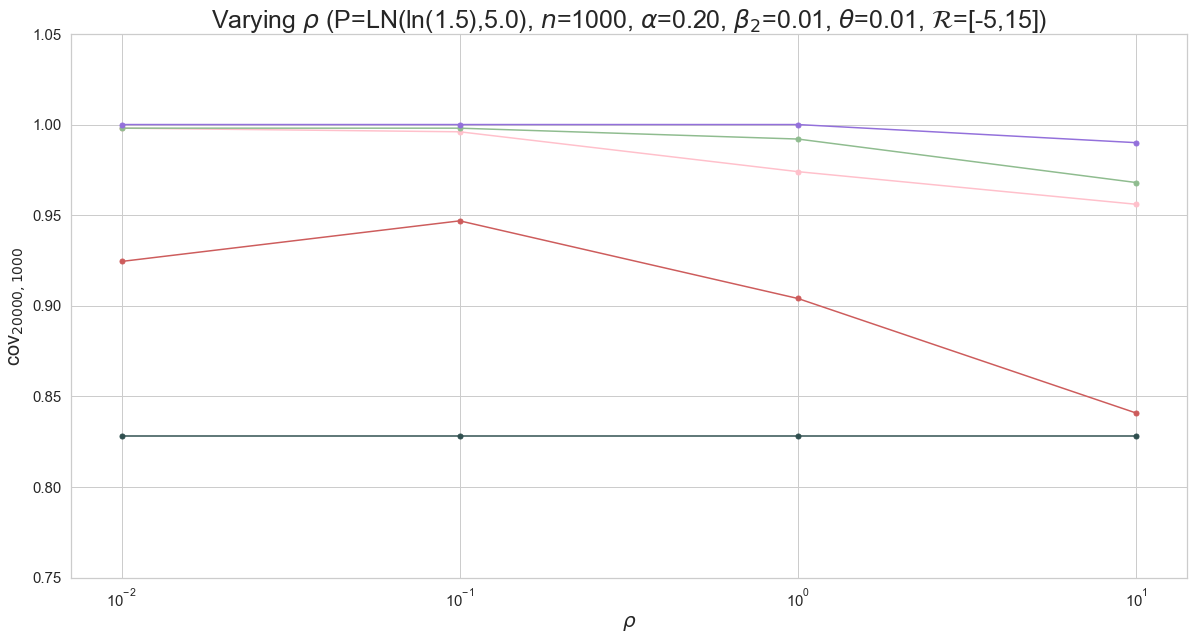

In [185]:
imp.reload(analysis)

run_indices = [0, 1, 2, 3, 4, 6, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [0, 1, 2, 3, 4, 6, 7, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
print(alg_names)
alg_colors = [colors[i] for i in run_indices_names]
title = r"Varying $\rho$ (P=LN(ln(%.1f),%.1f), $n$=%s, $\alpha$=%.2f, $\beta_2$=%.2f, $\theta$=%.2f, $\mathcal{R}$=[%s,%s])" % (true_median, data_scale, n, alpha, beta, granularity, range_center-range_scale, range_center+range_scale)
xlabel = r"$\rho$"
save_paths = coverage_save_paths(dir_path, dataset_name, param_string, alpha)

# save_path = save_paths[0]
# plt = analysis.plotCIs(algs, dataset_name, title, rho, xlabel, alg_names, alpha=alpha,
#             param_string=param_string, ratio=False, T=num_trials*num_datasets, n=n,
#           log=False, legend_out=False, xlim=None, ylim=[0.75, 1.05], sort='byParam', coverage=True, 
#             save=True, save_path=save_path, colors=alg_colors)

run_indices = [1, 3, 5, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [1, 3, 5, 7, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
print(alg_names)
alg_colors = [colors[i] for i in run_indices_names]

save_path = None
plt = analysis.plotCIs(algs, dataset_name, title, rho, xlabel, alg_names, alpha=alpha,
            param_string=param_string, ratio=False, T=num_trials*num_datasets, n=n,
          log=True, legend_out=False, legend=False, xlim=None, ylim=[0.75, 1.05], sort='byParam', coverage=True, 
            save=False, save_path=save_path, colors=alg_colors)

# Coverage - varying alpha

In [202]:
dataset_name='lognormal_flat'
num_datasets = 1000
n = 1000
data_center = 0.5
data_scale = 5.0
true_median = st.lognorm.median(data_scale, loc=data_center)
print("true median:", true_median)

# dataset_name='lognormal_cov'
# num_datasets = 1000
# n = 1000
# data_center = 0.5
# data_scale = 1.0
# true_median = st.lognorm.median(data_scale, loc=data_center)
# print("true median:", true_median)

num_trials = 5
range_center = 5
range_scale = 10
rho = 1.0
alpha = 0.05
beta = 0.01
quantile = 0.5
granularity = 0.05
em_granularity = 0.005

alpha = [0.05, 0.1, 0.15, 0.2, 0.25]
num_params = len(alpha)
param_string='alpha'

true median: 1.5


In [ ]:
imp.reload(run_cis)
imp.reload(wrap)
imp.reload(analysis)
imp.reload(cdf_median)
imp.reload(bs_cdf_median)

run_indices = [0,1]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_cis.runCIAlgs(dataset_name, num_datasets=num_datasets, num_trials=num_trials, num_params=num_params, 
                  param_string=param_string, 
                  rho=rho, range_center=range_center, range_scale=range_scale, true_median=true_median, 
                  alpha=alpha, beta=beta, 
                  quantile=quantile, n=n, em_granularity=em_granularity, granularity=granularity,
                  alg_list=algs, rerun_algs=True, gen_preprocess=True)

['Expmedian_naive', 'Expmedian', 'CDFmedian_naive', 'CDFmedian', 'CDFBSmedian', 'AdaBSCDFmedian', 'BSmedian_sep_reuse_queries', 'AdaBSmedian_sep']
['ExpMechUnion', 'ExpMech', 'CDFPostProcessUnion', 'CDFPostProcess', 'CDF+BinSearch', 'BinSearch+CDF', 'BinSearch', 'NoisyBinSearch', 'Nonprivate']
['Expmedian', 'CDFmedian', 'AdaBSCDFmedian', 'AdaBSmedian_sep']
['ExpMech', 'CDFPostProcess', 'BinSearch+CDF', 'NoisyBinSearch', 'Nonprivate']
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_alpha_0.npy
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_alpha_1.npy
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_alpha_2.npy
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_alpha_3.npy
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_alpha_4.npy
0 ExpMech
1 CDFPostProcess
2 BinSearch+CDF
3 NoisyBinSearch
4 Nonprivate


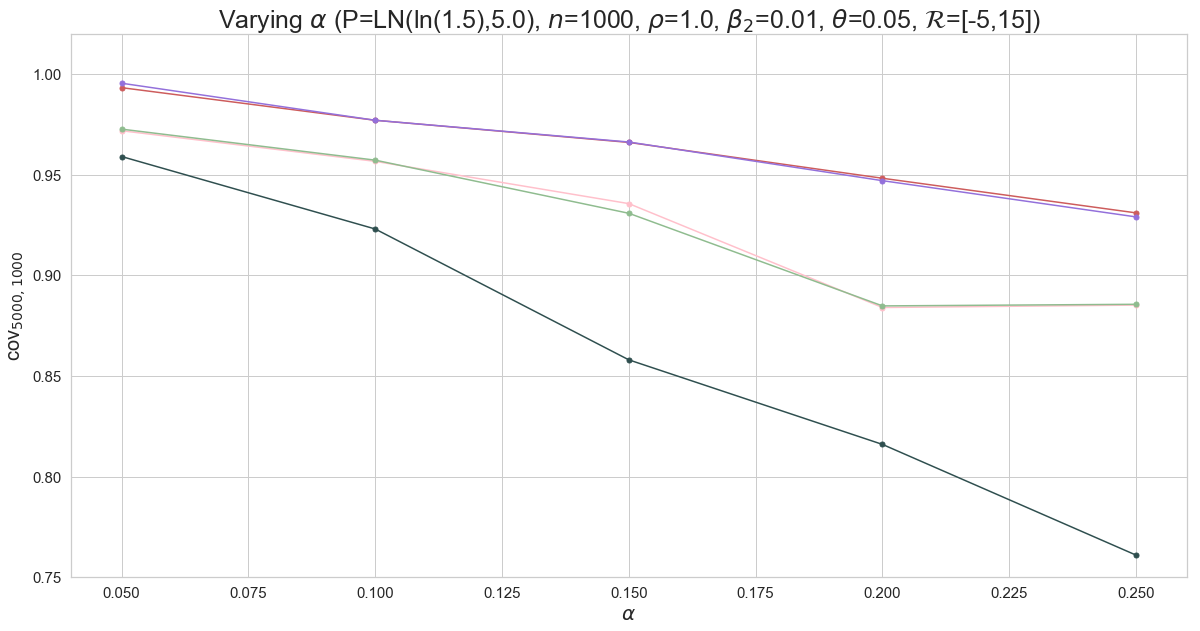

['Expmedian_naive', 'Expmedian', 'CDFmedian_naive', 'CDFmedian']
['ExpMechUnion', 'ExpMech', 'CDFPostProcessUnion', 'CDFPostProcess', 'Nonprivate']
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_naive_alpha_0.npy
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_naive_alpha_1.npy
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_naive_alpha_2.npy
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_naive_alpha_3.npy
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_naive_alpha_4.npy
0 ExpMechUnion
1 ExpMech
2 CDFPostProcessUnion
3 CDFPostProcess
4 Nonprivate


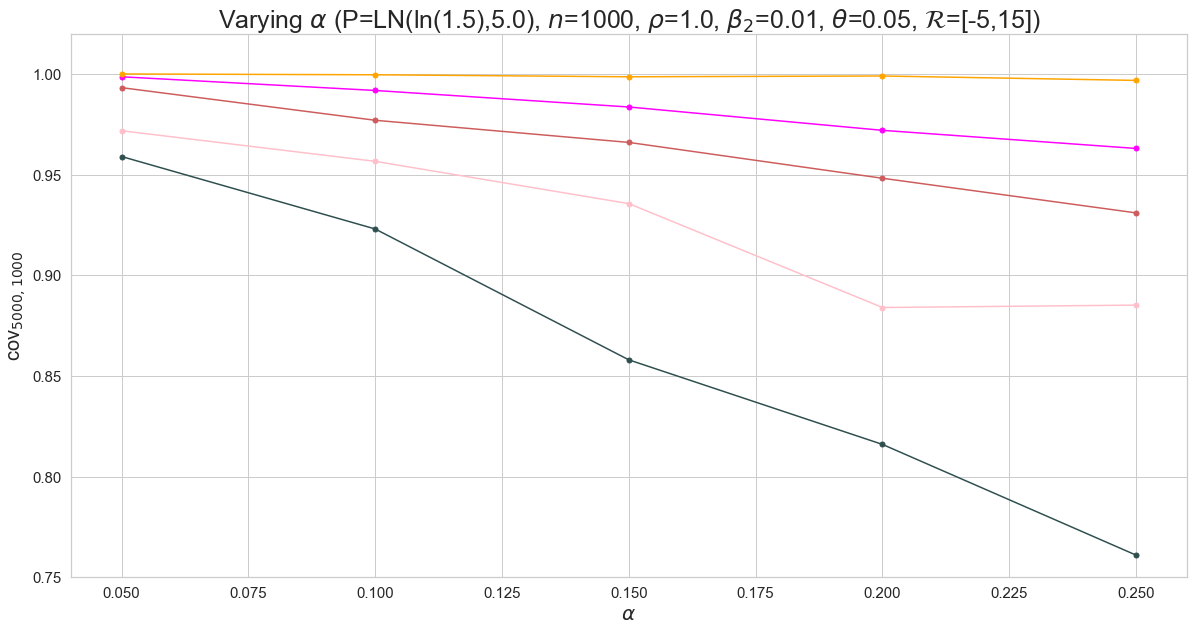

In [205]:
imp.reload(analysis)

run_indices = [0, 1, 2, 3, 4, 5, 6, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [0, 1, 2, 3, 4, 5, 6, 7, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
print(alg_names)
alg_colors = [colors[i] for i in run_indices_names]
save=True
title = r"Varying $\alpha$ (P=LN(ln(%.1f),%.1f), $n$=%s, $\rho$=%.1f, $\beta_2$=%.2f, $\theta$=%.2f, $\mathcal{R}$=[%s,%s])" % (true_median, data_scale, n, rho, beta, granularity, range_center-range_scale, range_center+range_scale)
xlabel = r"$\alpha$"
save_paths = coverage_save_paths(dir_path, dataset_name, param_string, alpha)

# save_path = save_paths[0]
# plt = analysis.plotCIs(algs, dataset_name, title, alpha, xlabel, alg_names,
#             param_string=param_string, ratio=False, alpha=None, n=n, T= num_trials*num_datasets,
#           log=False, legend_out=False, xlim=None, ylim=[0.75, 1.02], sort='byParam', coverage=True, 
#             save=save, save_path=save_path, colors=alg_colors)

run_indices = [1, 3, 5, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [1, 3, 5, 7, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
print(alg_names)
alg_colors = [colors[i] for i in run_indices_names]
save=True

save_path=save_paths[1]
plt = analysis.plotCIs(algs, dataset_name, title, alpha, xlabel, alg_names,
            param_string=param_string, ratio=False, alpha=None, n=n, T= num_trials*num_datasets,
          log=False, legend_out=False, legend=False, xlim=None, ylim=[0.75, 1.02], sort='byParam', coverage=True, 
            save=save, save_path=save_path, colors=alg_colors)

run_indices = [0, 1, 2, 3]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [0, 1, 2, 3, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
print(alg_names)
alg_colors = [colors[i] for i in run_indices_names]
save=True

save_path = save_paths[2]
plt = analysis.plotCIs(algs, dataset_name, title, alpha, xlabel, alg_names,
            param_string=param_string, ratio=False, alpha=None, n=n, T= num_trials*num_datasets,
          log=False, legend_out=False, legend=False, xlim=None, ylim=[0.75, 1.02], sort='byParam', coverage=True, 
            save=save, save_path=save_path, colors=alg_colors)

# Width - varying range size

In [206]:
num_trials = 5 # changed this from 5
range_center = 5
range_scale = 10
rho = 0.5
true_median = 1.52
alpha = 0.05
beta = 0.01
quantile = 0.5
granularity = 0.05
em_granularity = 0.005
num_datasets=200 # changed this from 100

dataset_name='lognormal_v0'
n = 1000
data_center = 0.5
data_scale = 1.0
true_median = st.lognorm.median(data_scale, loc=data_center)

param_string = 'range_scale'
range_scale = [10, 30, 100, 300]
range_center = [range_scale[i]/2.0 for i in range(len(range_scale))]
num_params = len(range_scale)
print(param_string, range_scale, range_center, 
      [(range_center[i]-range_scale[i], range_center[i]+range_scale[i]) for i in range(num_params)])

range_scale [10, 30, 100, 300] [5.0, 15.0, 50.0, 150.0] [(-5.0, 15.0), (-15.0, 45.0), (-50.0, 150.0), (-150.0, 450.0)]


In [162]:
imp.reload(run_cis)
imp.reload(wrap)
imp.reload(bs_cdf_median)

run_indices = [3]
algs = [alg_index[i][0] for i in run_indices]
run_cis.runCIAlgs(dataset_name, num_datasets=num_datasets, num_trials=num_trials, num_params=num_params, 
                  param_string=param_string, 
                  rho=rho, range_center=range_center, range_scale=range_scale, 
                  alpha=alpha, beta=beta, quantile=quantile, 
                  n=n, em_granularity=em_granularity, granularity=granularity, true_median=true_median,
                  alg_list=algs, rerun_algs=True, start_param=3, gen_preprocess=False)

starting CDF
param 3 of 4
n 1000 lb, ub -150.0 450.0 gran 0.05 alpha 0.05 rho 0.5
name, hyperparameters CDFmedian_range_scale_3 {'granularity': 0.05, 'beta': 0.01, 'alpha': 0.05, 'cdp': True, 'cdf_variances': [0.0, 34.82164027433216, 26.455894719326192, 49.076984240933, 27.993210657103553, 59.36528622395552, 46.33288593751659, 65.5044107516432, 29.11056197198574, 62.7182420266078, 52.47989359698137, 73.88702289887807, 50.782786573269846, 80.94090192041172, 66.03589875935234, 83.99346335376885, 29.712279064151534, 64.04014359796996, 54.91272080174046, 77.04003458283351, 54.96098806283001, 85.83928788916825, 72.04521036150581, 90.72295943511868, 53.34524736497983, 86.45915167908815, 75.4591260082382, 96.37247956962116, 72.2729703078389, 101.93730991446702, 86.27062951218412, 103.7344183660869, 30.019666387830974, 64.62108525361239, 55.915635616043005, 78.31650372909905, 56.788843599388215, 87.94069775768943, 74.5685933886871, 93.51989679426296, 56.58335181412875, 89.97081046020006, 79.39

dataset 1 of 200 lognormal_v0 lognormal_v0_813.npy
dataset 2 of 200 lognormal_v0 lognormal_v0_185.npy
dataset 3 of 200 lognormal_v0 lognormal_v0_191.npy
dataset 4 of 200 lognormal_v0 lognormal_v0_608.npy
dataset 5 of 200 lognormal_v0 lognormal_v0_146.npy
dataset 6 of 200 lognormal_v0 lognormal_v0_620.npy
dataset 7 of 200 lognormal_v0 lognormal_v0_634.npy
dataset 8 of 200 lognormal_v0 lognormal_v0_152.npy
dataset 9 of 200 lognormal_v0 lognormal_v0_387.npy
dataset 10 of 200 lognormal_v0 lognormal_v0_56.npy
dataset 11 of 200 lognormal_v0 lognormal_v0_42.npy
dataset 12 of 200 lognormal_v0 lognormal_v0_393.npy
dataset 13 of 200 lognormal_v0 lognormal_v0_378.npy
dataset 14 of 200 lognormal_v0 lognormal_v0_422.npy
dataset 15 of 200 lognormal_v0 lognormal_v0_95.npy
dataset 16 of 200 lognormal_v0 lognormal_v0_344.npy
dataset 17 of 200 lognormal_v0 lognormal_v0_350.npy
dataset 18 of 200 lognormal_v0 lognormal_v0_81.npy
dataset 19 of 200 lognormal_v0 lognormal_v0_436.npy
dataset 20 of 200 lognorm

dataset 159 of 200 lognormal_v0 lognormal_v0_430.npy
dataset 160 of 200 lognormal_v0 lognormal_v0_424.npy
dataset 161 of 200 lognormal_v0 lognormal_v0_93.npy
dataset 162 of 200 lognormal_v0 lognormal_v0_342.npy
dataset 163 of 200 lognormal_v0 lognormal_v0_418.npy
dataset 164 of 200 lognormal_v0 lognormal_v0_587.npy
dataset 165 of 200 lognormal_v0 lognormal_v0_593.npy
dataset 166 of 200 lognormal_v0 lognormal_v0_222.npy
dataset 167 of 200 lognormal_v0 lognormal_v0_544.npy
dataset 168 of 200 lognormal_v0 lognormal_v0_550.npy
dataset 169 of 200 lognormal_v0 lognormal_v0_236.npy
dataset 170 of 200 lognormal_v0 lognormal_v0_578.npy
dataset 171 of 200 lognormal_v0 lognormal_v0_785.npy
dataset 172 of 200 lognormal_v0 lognormal_v0_949.npy
dataset 173 of 200 lognormal_v0 lognormal_v0_791.npy
dataset 174 of 200 lognormal_v0 lognormal_v0_961.npy
dataset 175 of 200 lognormal_v0 lognormal_v0_975.npy
dataset 176 of 200 lognormal_v0 lognormal_v0_746.npy
dataset 177 of 200 lognormal_v0 lognormal_v0_75

['Expmedian_naive', 'Expmedian', 'CDFmedian', 'AdaBSCDFmedian', 'BSmedian_sep_reuse_queries', 'AdaBSmedian_sep']
['ExpMechUnion', 'ExpMech', 'CDFPostProcess', 'BinSearch+CDF', 'BinSearch', 'NoisyBinSearch', 'Nonprivate']
['Expmedian', 'CDFmedian', 'AdaBSCDFmedian', 'AdaBSmedian_sep']
['ExpMech', 'CDFPostProcess', 'BinSearch+CDF', 'NoisyBinSearch', 'Nonprivate']
../../figs/widths-range_scale/rel-width-boxplots-95-lognormal_v0-varying-range_scale.pdf
Nonpriv path: analysis/lognormal_v0_sizes_Expmedian_range_scale_0.npy
Nonpriv path: analysis/lognormal_v0_sizes_Expmedian_range_scale_1.npy
Nonpriv path: analysis/lognormal_v0_sizes_Expmedian_range_scale_2.npy
Nonpriv path: analysis/lognormal_v0_sizes_Expmedian_range_scale_3.npy
0 ExpMech
[1.0, 9.0, 17.0, 25.0]
1 CDFPostProcess
[1.7, 9.7, 17.7, 25.7]
2 BinSearch+CDF
[2.4, 10.4, 18.4, 26.4]
3 NoisyBinSearch
[3.0999999999999996, 11.1, 19.1, 27.1]
4 Nonprivate
[3.8, 11.8, 19.8, 27.8]


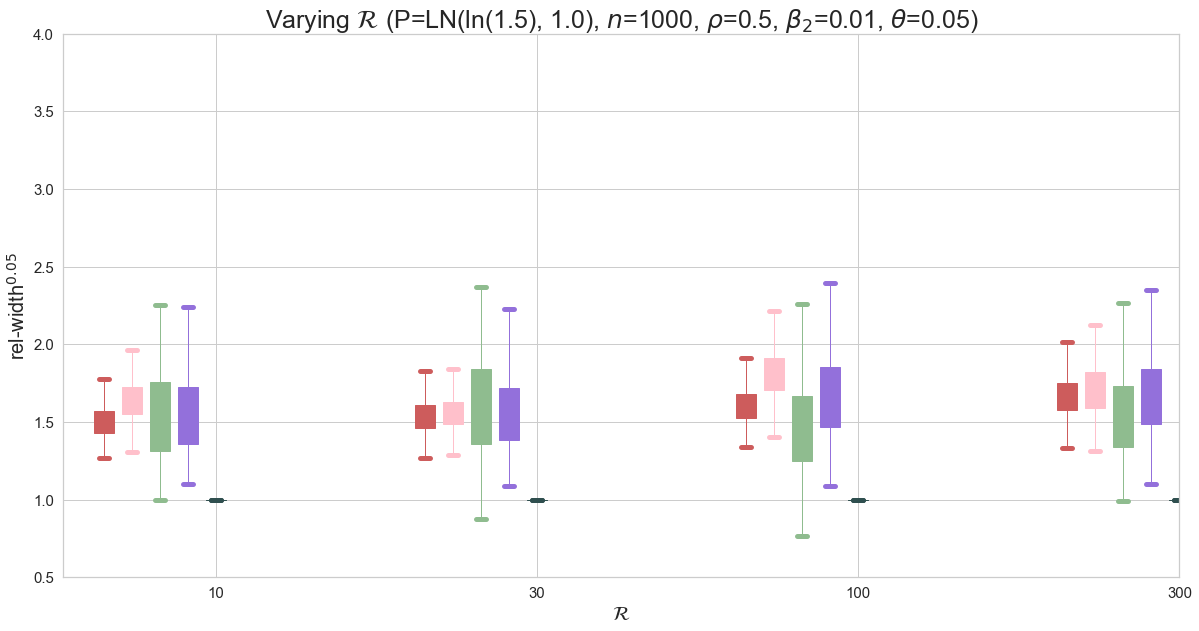

In [207]:
imp.reload(run_cis)
imp.reload(analysis)

run_indices = [0, 1, 3, 5, 6, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [0, 1, 3, 5, 6, 7, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
print(alg_names)
alg_colors = [colors[i] for i in run_indices_names]
save=True
title = r"Varying $\mathcal{R}$ (P=LN(ln(%.1f), %.1f), $n$=%s, $\rho$=%s, $\beta_2$=%.2f, $\theta$=%.2f)" % (true_median, data_scale, n, rho, beta, granularity)
xlabel = r"$\mathcal{R}$"

save_paths = width_save_paths(dir_path, dataset_name, param_string, alpha)

# save_path = save_paths[0]
# plt = analysis.plotCIs(algs, dataset_name, title, range_scale, xlabel, alg_names,
#             param_string=param_string, ratio=True, line_plot=True, box_plot=False,
#           ylim=[0.5, 5], log=True, legend_out=False, xlim=None, 
#                        sort='byParam', save=save, save_path=save_path, colors=alg_colors)

# save_path = save_paths[1]
# plt = analysis.plotCIs(algs, dataset_name, title, range_scale, xlabel, alg_names, 
#                        param_string=param_string, ratio=True, line_plot=False, box_plot=True,
#           log=False, legend_out=False, xlim=None, 
#                        ylim=[0.5, 5], sort='byParam', save=save, save_path=save_path, colors=alg_colors)


# save_path = save_paths[2]
# plt = analysis.plotCIs(algs, dataset_name, title, range_scale, xlabel, alg_names,
#             param_string=param_string, ratio=False, line_plot=True, box_plot=False,
#           log=False, legend_out=False, xlim=None, sort='byParam', save=save, save_path=save_path, 
#                        colors=alg_colors)

# save_path = save_paths[3]
# plt = analysis.plotCIs(algs, dataset_name, title, range_scale, xlabel, alg_names,
#             param_string=param_string, ratio=False, line_plot=False, box_plot=True,
#           log=False, legend_out=False, xlim=None, sort='byParam', save=save, save_path=save_path, 
#                        colors=alg_colors)

run_indices = [1, 3, 5, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [1, 3, 5, 7, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
print(alg_names)
alg_colors = [colors[i] for i in run_indices_names]
save=True

# save_path = save_paths[4]
# plt = analysis.plotCIs(algs, dataset_name, title, range_scale, xlabel, alg_names, 
#                        param_string=param_string, ratio=True, line_plot=True, box_plot=False,
#           log=False, legend_out=False, xlim=None, 
#                        ylim=[0.5, 3], sort='byParam', save=save, save_path=save_path, colors=alg_colors)

save_path = save_paths[5]
print(save_path)
plt = analysis.plotCIs(algs, dataset_name, title, range_scale, xlabel, alg_names, 
                       param_string=param_string, ratio=True, line_plot=False, box_plot=True,
          log=False, legend_out=False, xlim=None, legend=False,
                       ylim=[0.5, 4], sort='byParam', save=save, save_path=save_path, colors=alg_colors)

# Width - varying beta

In [208]:
num_trials = 5
range_center = 5
range_scale = 10
rho = 0.5
alpha = 0.05
beta = 0.01
quantile = 0.5
granularity = 0.05
em_granularity = 0.005
num_datasets=100

dataset_name = 'lognormal_v0'
n = 1000
data_center = 0.5
data_scale = 1.0
true_median = st.lognorm.median(data_scale, loc=data_center)

param_string = 'beta'
beta = [0.01, 0.02, 0.03, 0.04]
num_params = len(beta)
print(param_string, beta)

beta [0.01, 0.02, 0.03, 0.04]


In [ ]:
imp.reload(run_cis)
imp.reload(wrap)
imp.reload(bs_cdf_median)

run_indices = [0, 1]
algs = [alg_index[i][0] for i in run_indices]
run_cis.runCIAlgs(dataset_name, num_datasets=num_datasets, num_trials=num_trials, num_params=num_params, 
                  param_string=param_string, 
                  rho=rho, range_center=range_center, range_scale=range_scale, 
                  alpha=alpha, beta=beta, quantile=quantile, 
                  n=n, em_granularity=em_granularity, granularity=granularity, true_median=true_median,
                  alg_list=algs, rerun_algs=True, gen_preprocess=False)

['Expmedian_naive', 'Expmedian', 'CDFmedian_naive', 'CDFmedian', 'CDFBSmedian', 'AdaBSCDFmedian', 'BSmedian_sep_reuse_queries', 'AdaBSmedian_sep']
['ExpMechUnion', 'ExpMech', 'CDFPostProcessUnion', 'CDFPostProcess', 'CDF+BinSearch', 'BinSearch+CDF', 'BinSearch', 'NoisyBinSearch', 'Nonprivate']
['Expmedian', 'CDFmedian', 'AdaBSCDFmedian', 'AdaBSmedian_sep']
['ExpMech', 'CDFPostProcess', 'BinSearch+CDF', 'NoisyBinSearch', 'Nonprivate']
../../figs/widths-beta/rel-width-boxplots-95-lognormal_v0-varying-beta.pdf
Nonpriv path: analysis/lognormal_v0_sizes_Expmedian_beta_0.npy
Nonpriv path: analysis/lognormal_v0_sizes_Expmedian_beta_1.npy
Nonpriv path: analysis/lognormal_v0_sizes_Expmedian_beta_2.npy
Nonpriv path: analysis/lognormal_v0_sizes_Expmedian_beta_3.npy
0 ExpMech
[1.0, 9.0, 17.0, 25.0]
1 CDFPostProcess
[1.7, 9.7, 17.7, 25.7]
2 BinSearch+CDF
[2.4, 10.4, 18.4, 26.4]
3 NoisyBinSearch
[3.0999999999999996, 11.1, 19.1, 27.1]
4 Nonprivate
[3.8, 11.8, 19.8, 27.8]


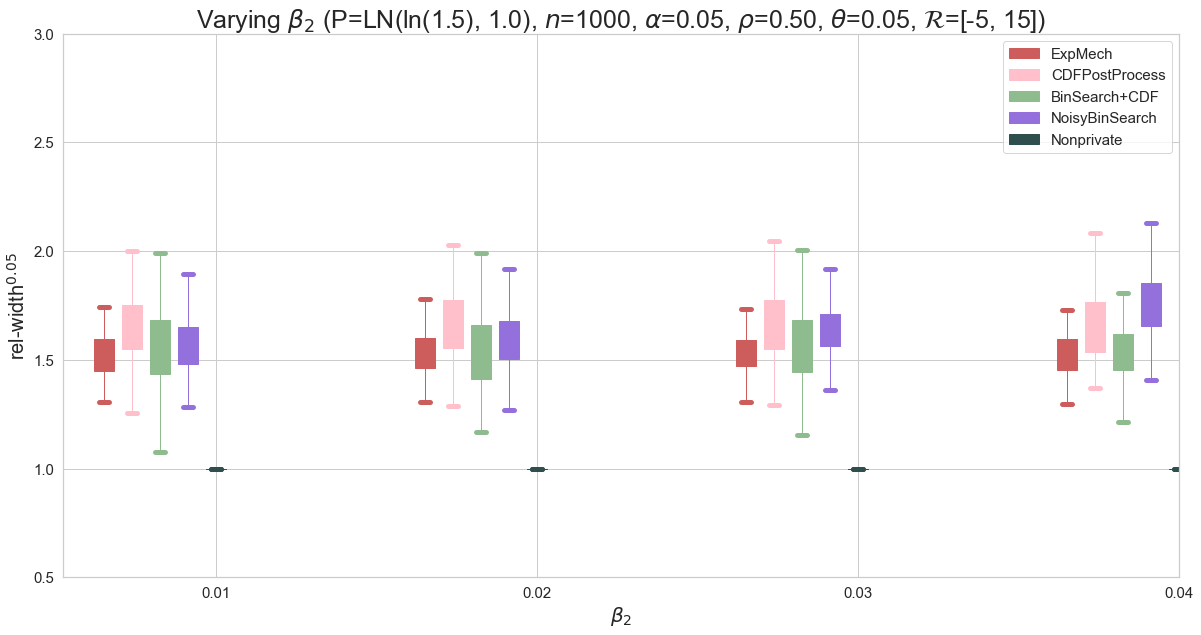

In [209]:
imp.reload(run_cis)
imp.reload(analysis)

run_indices = [0, 1, 2, 3, 4, 5, 6, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [0, 1, 2, 3, 4, 5, 6, 7, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
print(alg_names)
alg_colors = [colors[i] for i in run_indices_names]
save=True
title = r"Varying $\beta_2$ (P=LN(ln(%.1f), %.1f), $n$=%s, $\alpha$=%.2f, $\rho$=%.2f, $\theta$=%.2f, $\mathcal{R}$=[%s, %s])" % (true_median, data_scale, n, alpha, rho, granularity, range_center-range_scale, range_center+range_scale)        
xlabel = r"$\beta_2$"
save_paths = width_save_paths(dir_path, dataset_name, param_string, alpha)

# save_path = save_paths[0]
# plt = analysis.plotCIs(algs, dataset_name, title, beta, xlabel, alg_names, param_string=param_string, 
#                         ratio=True, line_plot=True, box_plot=False,
#                       log=False, legend_out=False, xlim=None, 
#                        ylim=[0.5,4], 
#                        sort='byParam', save=save, save_path=save_path, colors=alg_colors)

# save_path = save_paths[1]
# plt = analysis.plotCIs(algs, dataset_name, title, beta, xlabel, alg_names, param_string=param_string, 
#                        ratio=True, line_plot=False, box_plot=True,
#           log=False, legend_out=False, xlim=None, 
#                        ylim=[0.5,5], 
#                        sort='byParam', save=save, save_path=save_path, colors=alg_colors)

# save_path = save_paths[2]
# plt = analysis.plotCIs(algs, dataset_name, title, beta, xlabel, alg_names, param_string=param_string, 
#                        ratio=False, line_plot=True, box_plot=False,
#           log=False, legend_out=False, xlim=None, 
# #                        ylim=[0,12], 
#                        sort='byParam', save=save, save_path=save_path, colors=alg_colors)

# save_path = save_paths[3]
# plt = analysis.plotCIs(algs, dataset_name, title, beta, xlabel, alg_names, param_string=param_string, ratio=False, line_plot=False, box_plot=True,
#           log=False, legend_out=False, xlim=None, 
#                        ylim=[0,0.75], 
#                        sort='byParam', save=save, save_path=save_path, colors=alg_colors)

run_indices = [1, 3, 5, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [1, 3, 5, 7, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
print(alg_names)
alg_colors = [colors[i] for i in run_indices_names]
save=True

# save_path = save_paths[4]
# plt = analysis.plotCIs(algs, dataset_name, title, beta, xlabel, alg_names, param_string=param_string, 
#                        ratio=True, line_plot=True, box_plot=False,
#           log=False, legend_out=False, xlim=None, 
#                        ylim=[0.5,4], 
#                        sort='byParam', save=save, save_path=save_path, colors=alg_colors)

save_path = save_paths[5]
print(save_path)
plt = analysis.plotCIs(algs, dataset_name, title, beta, xlabel, alg_names, param_string=param_string, ratio=True, line_plot=False, box_plot=True,
          log=False, legend_out=False, xlim=None, 
                       ylim=[0.5,3], 
                       sort='byParam', save=save, save_path=save_path, colors=alg_colors)

# Width - varying rho

In [219]:
num_trials = 5
range_center = 5
range_scale = 10
rho = 0.5
alpha = 0.05
beta = 0.01
quantile = 0.5
granularity = 0.05 
em_granularity = 0.005
num_datasets=100

# dataset_name='lognormal_v0'
# n = 1000
# data_center = 0.5
# data_scale = 1.0
# true_median = st.lognorm.median(data_scale, loc=data_center)
dataset_name='lognormal_flat'
n = 1000
data_center = 0.5
data_scale = 5.0
true_median = st.lognorm.median(data_scale, loc=data_center)

param_string = 'rho'
num_params = 5
rho = np.logspace(-2.5, 0.5, num=num_params)
print(param_string, rho)

rho [0.00316228 0.01778279 0.1        0.56234133 3.16227766]


In [31]:
imp.reload(run_cis)
imp.reload(bs_cdf_median)
imp.reload(analysis)
imp.reload(wrap)

run_indices = [1, 3, 5, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_cis.runCIAlgs(dataset_name, num_datasets=num_datasets, num_trials=num_trials, num_params=num_params, 
                  param_string=param_string, 
                  rho=rho, range_center=range_center, range_scale=range_scale, 
                  alpha=alpha, beta=beta, quantile=quantile, 
                  n=n, em_granularity=em_granularity, granularity=granularity, true_median=true_median,
                  alg_list=algs, rerun_algs=True, gen_preprocess=False)

['Expmedian', 'CDFmedian', 'AdaBSCDFmedian', 'AdaBSmedian_sep']
starting EM
param 0 of 5
Computing coefficients
Finished computing coefficients
n: 1000
Searching for lower quantile
i: 500
Searching for upper quantile
i: 1000
n 1000 lb, ub -5 15 gran 0.05 alpha 0.05 rho 0.0031622776601683794
Expmedian_rho_0 {'em_granularity': 0.005, 'cdp': True, 'granularity': 0.05, 'beta': 0.01, 'alpha': 0.05, 'em_lower_quantile': 0.291, 'em_upper_quantile': 0.708}
computing 95% CIs
dataset 0 of 100 lognormal_flat lognormal_flat_n_3_53.npy
dataset 1 of 100 lognormal_flat lognormal_flat_479.npy
dataset 2 of 100 lognormal_flat lognormal_flat_n_3_47.npy
dataset 3 of 100 lognormal_flat lognormal_flat_n_4_66.npy
dataset 4 of 100 lognormal_flat lognormal_flat_323.npy
dataset 5 of 100 lognormal_flat lognormal_flat_445.npy
dataset 6 of 100 lognormal_flat lognormal_flat_451.npy
dataset 7 of 100 lognormal_flat lognormal_flat_337.npy
dataset 8 of 100 lognormal_flat lognormal_flat_n_4_72.npy
dataset 9 of 100 logno

dataset 27 of 100 lognormal_flat lognormal_flat_727.npy
dataset 28 of 100 lognormal_flat lognormal_flat_n_2_13.npy
dataset 29 of 100 lognormal_flat lognormal_flat_914.npy
dataset 30 of 100 lognormal_flat lognormal_flat_900.npy
dataset 31 of 100 lognormal_flat lognormal_flat_928.npy
dataset 32 of 100 lognormal_flat lognormal_flat_n_3_9.npy
dataset 33 of 100 lognormal_flat lognormal_flat_n_1_56.npy
dataset 34 of 100 lognormal_flat lognormal_flat_519.npy
dataset 35 of 100 lognormal_flat lognormal_flat_11.npy
dataset 36 of 100 lognormal_flat lognormal_flat_n_1_42.npy
dataset 37 of 100 lognormal_flat lognormal_flat_39.npy
dataset 38 of 100 lognormal_flat lognormal_flat_257.npy
dataset 39 of 100 lognormal_flat lognormal_flat_531.npy
dataset 40 of 100 lognormal_flat lognormal_flat_525.npy
dataset 41 of 100 lognormal_flat lognormal_flat_243.npy
dataset 42 of 100 lognormal_flat lognormal_flat_n_1_95.npy
dataset 43 of 100 lognormal_flat lognormal_flat_n_1_81.npy
dataset 44 of 100 lognormal_flat 

dataset 62 of 100 lognormal_flat lognormal_flat_915.npy
dataset 63 of 100 lognormal_flat lognormal_flat_n_2_12.npy
dataset 64 of 100 lognormal_flat lognormal_flat_726.npy
dataset 65 of 100 lognormal_flat lognormal_flat_732.npy
dataset 66 of 100 lognormal_flat lognormal_flat_849.npy
dataset 67 of 100 lognormal_flat lognormal_flat_691.npy
dataset 68 of 100 lognormal_flat lognormal_flat_685.npy
dataset 69 of 100 lognormal_flat lognormal_flat_875.npy
dataset 70 of 100 lognormal_flat lognormal_flat_1.npy
dataset 71 of 100 lognormal_flat lognormal_flat_861.npy
dataset 72 of 100 lognormal_flat lognormal_flat_n_0_17.npy
dataset 73 of 100 lognormal_flat lognormal_flat_134.npy
dataset 74 of 100 lognormal_flat lognormal_flat_652.npy
dataset 75 of 100 lognormal_flat lognormal_flat_646.npy
dataset 76 of 100 lognormal_flat lognormal_flat_120.npy
dataset 77 of 100 lognormal_flat lognormal_flat_108.npy
dataset 78 of 100 lognormal_flat lognormal_flat_493.npy
dataset 79 of 100 lognormal_flat lognormal_f

param 4 of 5
Computing coefficients
Finished computing coefficients
n: 1000
Searching for lower quantile
i: 500
Searching for upper quantile
i: 1000
n 1000 lb, ub -5 15 gran 0.05 alpha 0.05 rho 3.1622776601683795
Expmedian_rho_4 {'em_granularity': 0.005, 'cdp': True, 'granularity': 0.05, 'beta': 0.01, 'alpha': 0.05, 'em_lower_quantile': 0.463, 'em_upper_quantile': 0.536, 'save_path': 'results/Expmedian_rho_3_95_cdf_lognormal_flat_n_0_16.npy', 'lower_quantile': 0.466, 'upper_quantile': 0.532}
computing 95% CIs
dataset 0 of 100 lognormal_flat lognormal_flat_n_3_53.npy
dataset 1 of 100 lognormal_flat lognormal_flat_479.npy
dataset 2 of 100 lognormal_flat lognormal_flat_n_3_47.npy
dataset 3 of 100 lognormal_flat lognormal_flat_n_4_66.npy
dataset 4 of 100 lognormal_flat lognormal_flat_323.npy
dataset 5 of 100 lognormal_flat lognormal_flat_445.npy
dataset 6 of 100 lognormal_flat lognormal_flat_451.npy
dataset 7 of 100 lognormal_flat lognormal_flat_337.npy
dataset 8 of 100 lognormal_flat logn

dataset 1 of 100 lognormal_flat lognormal_flat_479.npy
dataset 2 of 100 lognormal_flat lognormal_flat_n_3_47.npy
dataset 3 of 100 lognormal_flat lognormal_flat_n_4_66.npy
dataset 4 of 100 lognormal_flat lognormal_flat_323.npy
dataset 5 of 100 lognormal_flat lognormal_flat_445.npy
dataset 6 of 100 lognormal_flat lognormal_flat_451.npy
dataset 7 of 100 lognormal_flat lognormal_flat_337.npy
dataset 8 of 100 lognormal_flat lognormal_flat_n_4_72.npy
dataset 9 of 100 lognormal_flat lognormal_flat_n_4_99.npy
dataset 10 of 100 lognormal_flat lognormal_flat_n_3_90.npy
dataset 11 of 100 lognormal_flat lognormal_flat_n_3_84.npy
dataset 12 of 100 lognormal_flat lognormal_flat_486.npy
dataset 13 of 100 lognormal_flat lognormal_flat_492.npy
dataset 14 of 100 lognormal_flat lognormal_flat_109.npy
dataset 15 of 100 lognormal_flat lognormal_flat_647.npy
dataset 16 of 100 lognormal_flat lognormal_flat_121.npy
dataset 17 of 100 lognormal_flat lognormal_flat_135.npy
dataset 18 of 100 lognormal_flat lognor

dataset 2 of 100 lognormal_flat lognormal_flat_n_3_47.npy
dataset 3 of 100 lognormal_flat lognormal_flat_n_4_66.npy
dataset 4 of 100 lognormal_flat lognormal_flat_323.npy
dataset 5 of 100 lognormal_flat lognormal_flat_445.npy
dataset 6 of 100 lognormal_flat lognormal_flat_451.npy
dataset 7 of 100 lognormal_flat lognormal_flat_337.npy
dataset 8 of 100 lognormal_flat lognormal_flat_n_4_72.npy
dataset 9 of 100 lognormal_flat lognormal_flat_n_4_99.npy
dataset 10 of 100 lognormal_flat lognormal_flat_n_3_90.npy
dataset 11 of 100 lognormal_flat lognormal_flat_n_3_84.npy
dataset 12 of 100 lognormal_flat lognormal_flat_486.npy
dataset 13 of 100 lognormal_flat lognormal_flat_492.npy
dataset 14 of 100 lognormal_flat lognormal_flat_109.npy
dataset 15 of 100 lognormal_flat lognormal_flat_647.npy
dataset 16 of 100 lognormal_flat lognormal_flat_121.npy
dataset 17 of 100 lognormal_flat lognormal_flat_135.npy
dataset 18 of 100 lognormal_flat lognormal_flat_n_0_16.npy
dataset 19 of 100 lognormal_flat lo

dataset 2 of 100 lognormal_flat lognormal_flat_n_3_47.npy
dataset 3 of 100 lognormal_flat lognormal_flat_n_4_66.npy
dataset 4 of 100 lognormal_flat lognormal_flat_323.npy
dataset 5 of 100 lognormal_flat lognormal_flat_445.npy
dataset 6 of 100 lognormal_flat lognormal_flat_451.npy
dataset 7 of 100 lognormal_flat lognormal_flat_337.npy
dataset 8 of 100 lognormal_flat lognormal_flat_n_4_72.npy
dataset 9 of 100 lognormal_flat lognormal_flat_n_4_99.npy
dataset 10 of 100 lognormal_flat lognormal_flat_n_3_90.npy
dataset 11 of 100 lognormal_flat lognormal_flat_n_3_84.npy
dataset 12 of 100 lognormal_flat lognormal_flat_486.npy
dataset 13 of 100 lognormal_flat lognormal_flat_492.npy
dataset 14 of 100 lognormal_flat lognormal_flat_109.npy
dataset 15 of 100 lognormal_flat lognormal_flat_647.npy
dataset 16 of 100 lognormal_flat lognormal_flat_121.npy
dataset 17 of 100 lognormal_flat lognormal_flat_135.npy
dataset 18 of 100 lognormal_flat lognormal_flat_n_0_16.npy
dataset 19 of 100 lognormal_flat lo

dataset 2 of 100 lognormal_flat lognormal_flat_n_3_47.npy
dataset 3 of 100 lognormal_flat lognormal_flat_n_4_66.npy
dataset 4 of 100 lognormal_flat lognormal_flat_323.npy
dataset 5 of 100 lognormal_flat lognormal_flat_445.npy
dataset 6 of 100 lognormal_flat lognormal_flat_451.npy
dataset 7 of 100 lognormal_flat lognormal_flat_337.npy
dataset 8 of 100 lognormal_flat lognormal_flat_n_4_72.npy
dataset 9 of 100 lognormal_flat lognormal_flat_n_4_99.npy
dataset 10 of 100 lognormal_flat lognormal_flat_n_3_90.npy
dataset 11 of 100 lognormal_flat lognormal_flat_n_3_84.npy
dataset 12 of 100 lognormal_flat lognormal_flat_486.npy
dataset 13 of 100 lognormal_flat lognormal_flat_492.npy
dataset 14 of 100 lognormal_flat lognormal_flat_109.npy
dataset 15 of 100 lognormal_flat lognormal_flat_647.npy
dataset 16 of 100 lognormal_flat lognormal_flat_121.npy
dataset 17 of 100 lognormal_flat lognormal_flat_135.npy
dataset 18 of 100 lognormal_flat lognormal_flat_n_0_16.npy
dataset 19 of 100 lognormal_flat lo

dataset 2 of 100 lognormal_flat lognormal_flat_n_3_47.npy
dataset 3 of 100 lognormal_flat lognormal_flat_n_4_66.npy
dataset 4 of 100 lognormal_flat lognormal_flat_323.npy
dataset 5 of 100 lognormal_flat lognormal_flat_445.npy
dataset 6 of 100 lognormal_flat lognormal_flat_451.npy
dataset 7 of 100 lognormal_flat lognormal_flat_337.npy
dataset 8 of 100 lognormal_flat lognormal_flat_n_4_72.npy
dataset 9 of 100 lognormal_flat lognormal_flat_n_4_99.npy
dataset 10 of 100 lognormal_flat lognormal_flat_n_3_90.npy
dataset 11 of 100 lognormal_flat lognormal_flat_n_3_84.npy
dataset 12 of 100 lognormal_flat lognormal_flat_486.npy
dataset 13 of 100 lognormal_flat lognormal_flat_492.npy
dataset 14 of 100 lognormal_flat lognormal_flat_109.npy
dataset 15 of 100 lognormal_flat lognormal_flat_647.npy
dataset 16 of 100 lognormal_flat lognormal_flat_121.npy
dataset 17 of 100 lognormal_flat lognormal_flat_135.npy
dataset 18 of 100 lognormal_flat lognormal_flat_n_0_16.npy
dataset 19 of 100 lognormal_flat lo

dataset 41 of 100 lognormal_flat lognormal_flat_243.npy
dataset 42 of 100 lognormal_flat lognormal_flat_n_1_95.npy
dataset 43 of 100 lognormal_flat lognormal_flat_n_1_81.npy
dataset 44 of 100 lognormal_flat lognormal_flat_294.npy
dataset 45 of 100 lognormal_flat lognormal_flat_280.npy
dataset 46 of 100 lognormal_flat lognormal_flat_281.npy
dataset 47 of 100 lognormal_flat lognormal_flat_295.npy
dataset 48 of 100 lognormal_flat lognormal_flat_n_1_80.npy
dataset 49 of 100 lognormal_flat lognormal_flat_n_1_94.npy
dataset 50 of 100 lognormal_flat lognormal_flat_524.npy
dataset 51 of 100 lognormal_flat lognormal_flat_242.npy
dataset 52 of 100 lognormal_flat lognormal_flat_256.npy
dataset 53 of 100 lognormal_flat lognormal_flat_38.npy
dataset 54 of 100 lognormal_flat lognormal_flat_530.npy
dataset 55 of 100 lognormal_flat lognormal_flat_518.npy
dataset 56 of 100 lognormal_flat lognormal_flat_n_1_43.npy
dataset 57 of 100 lognormal_flat lognormal_flat_10.npy
dataset 58 of 100 lognormal_flat lo

dataset 79 of 100 lognormal_flat lognormal_flat_487.npy
dataset 80 of 100 lognormal_flat lognormal_flat_n_3_85.npy
dataset 81 of 100 lognormal_flat lognormal_flat_n_4_98.npy
dataset 82 of 100 lognormal_flat lognormal_flat_n_3_91.npy
dataset 83 of 100 lognormal_flat lognormal_flat_450.npy
dataset 84 of 100 lognormal_flat lognormal_flat_n_4_73.npy
dataset 85 of 100 lognormal_flat lognormal_flat_336.npy
dataset 86 of 100 lognormal_flat lognormal_flat_322.npy
dataset 87 of 100 lognormal_flat lognormal_flat_n_4_67.npy
dataset 88 of 100 lognormal_flat lognormal_flat_444.npy
dataset 89 of 100 lognormal_flat lognormal_flat_n_3_46.npy
dataset 90 of 100 lognormal_flat lognormal_flat_478.npy
dataset 91 of 100 lognormal_flat lognormal_flat_n_3_52.npy
dataset 92 of 100 lognormal_flat lognormal_flat_308.npy
dataset 93 of 100 lognormal_flat lognormal_flat_n_3_44.npy
dataset 94 of 100 lognormal_flat lognormal_flat_n_3_50.npy
dataset 95 of 100 lognormal_flat lognormal_flat_n_4_59.npy
dataset 96 of 100 

dataset 10 of 100 lognormal_flat lognormal_flat_n_3_90.npy
dataset 11 of 100 lognormal_flat lognormal_flat_n_3_84.npy
dataset 12 of 100 lognormal_flat lognormal_flat_486.npy
dataset 13 of 100 lognormal_flat lognormal_flat_492.npy
dataset 14 of 100 lognormal_flat lognormal_flat_109.npy
dataset 15 of 100 lognormal_flat lognormal_flat_647.npy
dataset 16 of 100 lognormal_flat lognormal_flat_121.npy
dataset 17 of 100 lognormal_flat lognormal_flat_135.npy
dataset 18 of 100 lognormal_flat lognormal_flat_n_0_16.npy
dataset 19 of 100 lognormal_flat lognormal_flat_653.npy
dataset 20 of 100 lognormal_flat lognormal_flat_0.npy
dataset 21 of 100 lognormal_flat lognormal_flat_860.npy
dataset 22 of 100 lognormal_flat lognormal_flat_874.npy
dataset 23 of 100 lognormal_flat lognormal_flat_684.npy
dataset 24 of 100 lognormal_flat lognormal_flat_690.npy
dataset 25 of 100 lognormal_flat lognormal_flat_848.npy
dataset 26 of 100 lognormal_flat lognormal_flat_733.npy
dataset 27 of 100 lognormal_flat lognorma

dataset 47 of 100 lognormal_flat lognormal_flat_295.npy
dataset 48 of 100 lognormal_flat lognormal_flat_n_1_80.npy
dataset 49 of 100 lognormal_flat lognormal_flat_n_1_94.npy
dataset 50 of 100 lognormal_flat lognormal_flat_524.npy
dataset 51 of 100 lognormal_flat lognormal_flat_242.npy
dataset 52 of 100 lognormal_flat lognormal_flat_256.npy
dataset 53 of 100 lognormal_flat lognormal_flat_38.npy
dataset 54 of 100 lognormal_flat lognormal_flat_530.npy
dataset 55 of 100 lognormal_flat lognormal_flat_518.npy
dataset 56 of 100 lognormal_flat lognormal_flat_n_1_43.npy
dataset 57 of 100 lognormal_flat lognormal_flat_10.npy
dataset 58 of 100 lognormal_flat lognormal_flat_n_1_57.npy
dataset 59 of 100 lognormal_flat lognormal_flat_n_3_8.npy
dataset 60 of 100 lognormal_flat lognormal_flat_929.npy
dataset 61 of 100 lognormal_flat lognormal_flat_901.npy
dataset 62 of 100 lognormal_flat lognormal_flat_915.npy
dataset 63 of 100 lognormal_flat lognormal_flat_n_2_12.npy
dataset 64 of 100 lognormal_flat 

dataset 80 of 100 lognormal_flat lognormal_flat_n_3_85.npy
dataset 81 of 100 lognormal_flat lognormal_flat_n_4_98.npy
dataset 82 of 100 lognormal_flat lognormal_flat_n_3_91.npy
dataset 83 of 100 lognormal_flat lognormal_flat_450.npy
dataset 84 of 100 lognormal_flat lognormal_flat_n_4_73.npy
dataset 85 of 100 lognormal_flat lognormal_flat_336.npy
dataset 86 of 100 lognormal_flat lognormal_flat_322.npy
dataset 87 of 100 lognormal_flat lognormal_flat_n_4_67.npy
dataset 88 of 100 lognormal_flat lognormal_flat_444.npy
dataset 89 of 100 lognormal_flat lognormal_flat_n_3_46.npy
dataset 90 of 100 lognormal_flat lognormal_flat_478.npy
dataset 91 of 100 lognormal_flat lognormal_flat_n_3_52.npy
dataset 92 of 100 lognormal_flat lognormal_flat_308.npy
dataset 93 of 100 lognormal_flat lognormal_flat_n_3_44.npy
dataset 94 of 100 lognormal_flat lognormal_flat_n_3_50.npy
dataset 95 of 100 lognormal_flat lognormal_flat_n_4_59.npy
dataset 96 of 100 lognormal_flat lognormal_flat_334.npy
dataset 97 of 100 

noise scale was 0
preprocessing finished!
dataset 1 of 100 lognormal_flat lognormal_flat_479.npy
dataset 2 of 100 lognormal_flat lognormal_flat_n_3_47.npy
dataset 3 of 100 lognormal_flat lognormal_flat_n_4_66.npy
Starting CDF preprocessing
new msg
noise scale was 0
preprocessing finished!
dataset 4 of 100 lognormal_flat lognormal_flat_323.npy
dataset 5 of 100 lognormal_flat lognormal_flat_445.npy
dataset 6 of 100 lognormal_flat lognormal_flat_451.npy
dataset 7 of 100 lognormal_flat lognormal_flat_337.npy
dataset 8 of 100 lognormal_flat lognormal_flat_n_4_72.npy
dataset 9 of 100 lognormal_flat lognormal_flat_n_4_99.npy
dataset 10 of 100 lognormal_flat lognormal_flat_n_3_90.npy
dataset 11 of 100 lognormal_flat lognormal_flat_n_3_84.npy
dataset 12 of 100 lognormal_flat lognormal_flat_486.npy
dataset 13 of 100 lognormal_flat lognormal_flat_492.npy
dataset 14 of 100 lognormal_flat lognormal_flat_109.npy
dataset 15 of 100 lognormal_flat lognormal_flat_647.npy
dataset 16 of 100 lognormal_flat

dataset 28 of 100 lognormal_flat lognormal_flat_n_2_13.npy
Starting CDF preprocessing
new msg
noise scale was 0
preprocessing finished!
dataset 29 of 100 lognormal_flat lognormal_flat_914.npy
dataset 30 of 100 lognormal_flat lognormal_flat_900.npy
dataset 31 of 100 lognormal_flat lognormal_flat_928.npy
dataset 32 of 100 lognormal_flat lognormal_flat_n_3_9.npy
dataset 33 of 100 lognormal_flat lognormal_flat_n_1_56.npy
Starting CDF preprocessing
new msg
noise scale was 0
preprocessing finished!
dataset 34 of 100 lognormal_flat lognormal_flat_519.npy
dataset 35 of 100 lognormal_flat lognormal_flat_11.npy
dataset 36 of 100 lognormal_flat lognormal_flat_n_1_42.npy
dataset 37 of 100 lognormal_flat lognormal_flat_39.npy
dataset 38 of 100 lognormal_flat lognormal_flat_257.npy
dataset 39 of 100 lognormal_flat lognormal_flat_531.npy
dataset 40 of 100 lognormal_flat lognormal_flat_525.npy
dataset 41 of 100 lognormal_flat lognormal_flat_243.npy
dataset 42 of 100 lognormal_flat lognormal_flat_n_1_9

dataset 54 of 100 lognormal_flat lognormal_flat_530.npy
dataset 55 of 100 lognormal_flat lognormal_flat_518.npy
dataset 56 of 100 lognormal_flat lognormal_flat_n_1_43.npy
dataset 57 of 100 lognormal_flat lognormal_flat_10.npy
dataset 58 of 100 lognormal_flat lognormal_flat_n_1_57.npy
dataset 59 of 100 lognormal_flat lognormal_flat_n_3_8.npy
dataset 60 of 100 lognormal_flat lognormal_flat_929.npy
dataset 61 of 100 lognormal_flat lognormal_flat_901.npy
dataset 62 of 100 lognormal_flat lognormal_flat_915.npy
dataset 63 of 100 lognormal_flat lognormal_flat_n_2_12.npy
dataset 64 of 100 lognormal_flat lognormal_flat_726.npy
dataset 65 of 100 lognormal_flat lognormal_flat_732.npy
dataset 66 of 100 lognormal_flat lognormal_flat_849.npy
dataset 67 of 100 lognormal_flat lognormal_flat_691.npy
dataset 68 of 100 lognormal_flat lognormal_flat_685.npy
dataset 69 of 100 lognormal_flat lognormal_flat_875.npy
dataset 70 of 100 lognormal_flat lognormal_flat_1.npy
dataset 71 of 100 lognormal_flat lognorm

['Expmedian', 'CDFmedian', 'AdaBSCDFmedian', 'AdaBSmedian_sep']
['ExpMech', 'CDFPostProcess', 'BinSearch+CDF', 'NoisyBinSearch', 'Nonprivate']
['Expmedian', 'CDFmedian', 'AdaBSCDFmedian', 'AdaBSmedian_sep']
['ExpMech', 'CDFPostProcess', 'BinSearch+CDF', 'NoisyBinSearch', 'Nonprivate']
../../figs/widths-rho/rel-width-boxplots-95-lognormal_flat-varying-rho.pdf
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_rho_0.npy
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_rho_1.npy
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_rho_2.npy
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_rho_3.npy
Nonpriv path: analysis/lognormal_flat_sizes_Expmedian_rho_4.npy
0 ExpMech
[1.0, 9.0, 17.0, 25.0, 33.0]
1 CDFPostProcess
[1.7, 9.7, 17.7, 25.7, 33.7]
2 BinSearch+CDF
[2.4, 10.4, 18.4, 26.4, 34.4]
3 NoisyBinSearch
[3.0999999999999996, 11.1, 19.1, 27.1, 35.1]
4 Nonprivate
[3.8, 11.8, 19.8, 27.8, 35.8]


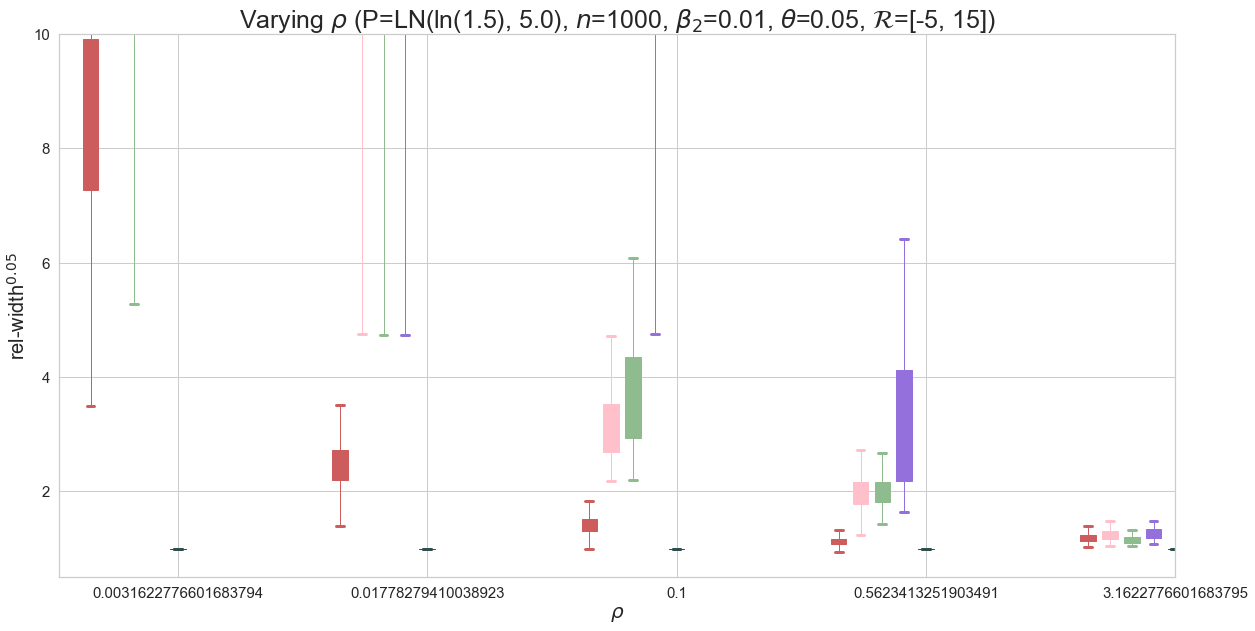

In [221]:
imp.reload(run_cis)
imp.reload(analysis)

run_indices = [1, 3, 5, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [1, 3, 5, 7, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
print(alg_names)
alg_colors = [colors[i] for i in run_indices_names]
save=True
save_paths = width_save_paths(dir_path, dataset_name, param_string, alpha)
title = r"Varying $\rho$ (P=LN(ln(%.1f), %.1f), $n$=%s, $\beta_2$=%.2f, $\theta$=%.2f, $\mathcal{R}$=[%s, %s])" % (true_median, data_scale, n, beta, granularity, range_center-range_scale, range_center+range_scale)
xlabel = r"$\rho$"

# save_path = save_paths[0]
# plt = analysis.plotCIs(algs, dataset_name, title, rho, xlabel, alg_names,
#             param_string=param_string, ratio=True, line_plot=True, box_plot=False,
#           log=True, legend_out=False, xlim=None, 
#                        ylim=[0.5,16], 
#                        sort='byParam', save=save, save_path=save_path, colors=alg_colors)

# save_path = save_paths[1]
# plt = analysis.plotCIs(algs, dataset_name, title, rho, xlabel, alg_names,
#             param_string=param_string, ratio=True, line_plot=False, box_plot=True,
#           log=False, legend_out=False, xlim=None, 
#                        ylim=[0.5,16], 
#                        sort='byParam', save=save, save_path=save_path, colors=alg_colors)

# save_path = save_paths[2]
# plt = analysis.plotCIs(algs, dataset_name, title, rho, xlabel, alg_names,
#             param_string='rho', ratio=False, line_plot=True, box_plot=False,
#           log=True, legend_out=False, xlim=None, 
# #                        ylim=[0,12], 
#                        sort='byParam', save=save, save_path=save_path, colors=alg_colors)

# save_path = save_paths[3]
# plt = analysis.plotCIs(algs, dataset_name, title, rho, xlabel, alg_names,
#             param_string=param_string, ratio=False, line_plot=False, box_plot=True,
#           log=False, legend_out=False, xlim=None, 
#                        ylim=[0,2], 
#                        sort='byParam', save=save, save_path=save_path, colors=alg_colors)

run_indices = [1, 3, 5, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [1, 3, 5, 7, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
print(alg_names)
alg_colors = [colors[i] for i in run_indices_names]
save=True

# save_path = save_paths[4]
# plt = analysis.plotCIs(algs, dataset_name, title, rho, xlabel, alg_names,
#             param_string=param_string, ratio=True, line_plot=True, box_plot=False,
#           log=True, legend_out=False, xlim=None, 
#                        ylim=[0.5,16], 
#                        sort='byParam', save=save, save_path=save_path, colors=alg_colors)

save_path = save_paths[5] 
print(save_path)
plt = analysis.plotCIs(algs, dataset_name, title, rho, xlabel, alg_names,
            param_string=param_string, ratio=True, line_plot=False, box_plot=True,
          log=False, legend_out=False, xlim=None, legend=False,
                       ylim=[0.5,10], 
                       sort='byParam', save=save, save_path=save_path, colors=alg_colors)

# Width - varying n

In [222]:
num_trials = 5
range_center = 5
range_scale = 10
rho = 0.5
true_median = 1.5
alpha = 0.05
beta = 0.01
quantile = 0.5
granularity = 0.05
em_granularity = 0.005
num_datasets=100

# dataset_name='lognormal_v1'
# n = 1000
# data_center = 0.5
# data_scale = 1.0
# true_median = st.lognorm.median(data_scale, loc=data_center)
dataset_name='lognormal_flat'
n = 1000
data_center = 0.5
data_scale = 5.0
true_median = st.lognorm.median(data_scale, loc=data_center)

param_string = 'n'
num_params = 5
n = np.linspace(100, 1500, num=num_params)
print(param_string, n)

n [ 100.  450.  800. 1150. 1500.]


In [25]:
imp.reload(run_cis)
imp.reload(wrap)
imp.reload(bs_cdf_median)

run_indices = [5, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_cis.runCIAlgs(dataset_name, num_datasets=num_datasets, num_trials=num_trials, num_params=num_params, 
                  param_string=param_string, 
                  rho=rho, range_center=range_center, range_scale=range_scale, 
                  alpha=alpha, beta=beta, quantile=quantile, 
                  n=n, granularity=granularity, em_granularity=em_granularity, true_median=true_median,
                  alg_list=algs, data_center=data_center, data_scale=data_scale, data_distribution='lognormal',
                  gen_data=True, rerun_algs=True, gen_preprocess=False)

['AdaBSCDFmedian', 'AdaBSmedian_sep']
generating datasets
starting Adaptive BS two-shot
param 0 of 5
n 100 lb, ub -5 15 gran 0.05 alpha 0.05 rho 0.5
AdaBSmedian_sep_n_0 {'separate_runs': True, 'adaptive': True, 'cdp': True, 'granularity': 0.05, 'beta': 0.01, 'alpha': 0.05}
computing 95% CIs
dataset 0 of 100 lognormal_flat_n_0 lognormal_flat_n_0_16.npy
dataset 1 of 100 lognormal_flat_n_0 lognormal_flat_n_0_17.npy
dataset 2 of 100 lognormal_flat_n_0 lognormal_flat_n_0_29.npy
dataset 3 of 100 lognormal_flat_n_0 lognormal_flat_n_0_15.npy
dataset 4 of 100 lognormal_flat_n_0 lognormal_flat_n_0_14.npy
dataset 5 of 100 lognormal_flat_n_0 lognormal_flat_n_0_28.npy
dataset 6 of 100 lognormal_flat_n_0 lognormal_flat_n_0_10.npy
dataset 7 of 100 lognormal_flat_n_0 lognormal_flat_n_0_38.npy
dataset 8 of 100 lognormal_flat_n_0 lognormal_flat_n_0_39.npy
dataset 9 of 100 lognormal_flat_n_0 lognormal_flat_n_0_11.npy
dataset 10 of 100 lognormal_flat_n_0 lognormal_flat_n_0_13.npy
dataset 11 of 100 lognorm

dataset 22 of 100 lognormal_flat_n_1 lognormal_flat_n_1_50.npy
dataset 23 of 100 lognormal_flat_n_1 lognormal_flat_n_1_87.npy
dataset 24 of 100 lognormal_flat_n_1 lognormal_flat_n_1_93.npy
dataset 25 of 100 lognormal_flat_n_1 lognormal_flat_n_1_92.npy
dataset 26 of 100 lognormal_flat_n_1 lognormal_flat_n_1_86.npy
dataset 27 of 100 lognormal_flat_n_1 lognormal_flat_n_1_51.npy
dataset 28 of 100 lognormal_flat_n_1 lognormal_flat_n_1_45.npy
dataset 29 of 100 lognormal_flat_n_1 lognormal_flat_n_1_79.npy
dataset 30 of 100 lognormal_flat_n_1 lognormal_flat_n_1_53.npy
dataset 31 of 100 lognormal_flat_n_1 lognormal_flat_n_1_47.npy
dataset 32 of 100 lognormal_flat_n_1 lognormal_flat_n_1_90.npy
dataset 33 of 100 lognormal_flat_n_1 lognormal_flat_n_1_84.npy
dataset 34 of 100 lognormal_flat_n_1 lognormal_flat_n_1_85.npy
dataset 35 of 100 lognormal_flat_n_1 lognormal_flat_n_1_91.npy
dataset 36 of 100 lognormal_flat_n_1 lognormal_flat_n_1_46.npy
dataset 37 of 100 lognormal_flat_n_1 lognormal_flat_n_1

dataset 49 of 100 lognormal_flat_n_2 lognormal_flat_n_2_2.npy
dataset 50 of 100 lognormal_flat_n_2 lognormal_flat_n_2_0.npy
dataset 51 of 100 lognormal_flat_n_2 lognormal_flat_n_2_52.npy
dataset 52 of 100 lognormal_flat_n_2 lognormal_flat_n_2_46.npy
dataset 53 of 100 lognormal_flat_n_2 lognormal_flat_n_2_91.npy
dataset 54 of 100 lognormal_flat_n_2 lognormal_flat_n_2_85.npy
dataset 55 of 100 lognormal_flat_n_2 lognormal_flat_n_2_84.npy
dataset 56 of 100 lognormal_flat_n_2 lognormal_flat_n_2_90.npy
dataset 57 of 100 lognormal_flat_n_2 lognormal_flat_n_2_47.npy
dataset 58 of 100 lognormal_flat_n_2 lognormal_flat_n_2_53.npy
dataset 59 of 100 lognormal_flat_n_2 lognormal_flat_n_2_1.npy
dataset 60 of 100 lognormal_flat_n_2 lognormal_flat_n_2_5.npy
dataset 61 of 100 lognormal_flat_n_2 lognormal_flat_n_2_57.npy
dataset 62 of 100 lognormal_flat_n_2 lognormal_flat_n_2_43.npy
dataset 63 of 100 lognormal_flat_n_2 lognormal_flat_n_2_94.npy
dataset 64 of 100 lognormal_flat_n_2 lognormal_flat_n_2_80.

dataset 76 of 100 lognormal_flat_n_3 lognormal_flat_n_3_65.npy
dataset 77 of 100 lognormal_flat_n_3 lognormal_flat_n_3_71.npy
dataset 78 of 100 lognormal_flat_n_3 lognormal_flat_n_3_59.npy
dataset 79 of 100 lognormal_flat_n_3 lognormal_flat_n_3_3.npy
dataset 80 of 100 lognormal_flat_n_3 lognormal_flat_n_3_2.npy
dataset 81 of 100 lognormal_flat_n_3 lognormal_flat_n_3_58.npy
dataset 82 of 100 lognormal_flat_n_3 lognormal_flat_n_3_70.npy
dataset 83 of 100 lognormal_flat_n_3 lognormal_flat_n_3_64.npy
dataset 84 of 100 lognormal_flat_n_3 lognormal_flat_n_3_48.npy
dataset 85 of 100 lognormal_flat_n_3 lognormal_flat_n_3_60.npy
dataset 86 of 100 lognormal_flat_n_3 lognormal_flat_n_3_74.npy
dataset 87 of 100 lognormal_flat_n_3 lognormal_flat_n_3_6.npy
dataset 88 of 100 lognormal_flat_n_3 lognormal_flat_n_3_7.npy
dataset 89 of 100 lognormal_flat_n_3 lognormal_flat_n_3_75.npy
dataset 90 of 100 lognormal_flat_n_3 lognormal_flat_n_3_61.npy
dataset 91 of 100 lognormal_flat_n_3 lognormal_flat_n_3_49.

dataset 99 of 100 lognormal_flat_n_4 lognormal_flat_n_4_43.npy
results/lognormal_flat_n_4_AdaBSmedian_sep_n_4_95.npy
running analysis
nonpriv_median: 1.4143156949087712
Coverage - nonpriv: 0.95 priv: 0.992
starting Adaptive BS CDF
param 0 of 5
n 100 lb, ub -5 15 gran 0.05 alpha 0.05 rho 0.5
AdaBSCDFmedian_n_0 {'cdp': True, 'granularity': 0.05, 'beta': 0.01, 'alpha': 0.05}
computing 95% CIs
dataset 0 of 100 lognormal_flat_n_0 lognormal_flat_n_0_16.npy
dataset 1 of 100 lognormal_flat_n_0 lognormal_flat_n_0_17.npy
dataset 2 of 100 lognormal_flat_n_0 lognormal_flat_n_0_29.npy
dataset 3 of 100 lognormal_flat_n_0 lognormal_flat_n_0_15.npy
dataset 4 of 100 lognormal_flat_n_0 lognormal_flat_n_0_14.npy
dataset 5 of 100 lognormal_flat_n_0 lognormal_flat_n_0_28.npy
dataset 6 of 100 lognormal_flat_n_0 lognormal_flat_n_0_10.npy
dataset 7 of 100 lognormal_flat_n_0 lognormal_flat_n_0_38.npy
dataset 8 of 100 lognormal_flat_n_0 lognormal_flat_n_0_39.npy
dataset 9 of 100 lognormal_flat_n_0 lognormal_fla

dataset 18 of 100 lognormal_flat_n_1 lognormal_flat_n_1_54.npy
dataset 19 of 100 lognormal_flat_n_1 lognormal_flat_n_1_40.npy
dataset 20 of 100 lognormal_flat_n_1 lognormal_flat_n_1_78.npy
dataset 21 of 100 lognormal_flat_n_1 lognormal_flat_n_1_44.npy
dataset 22 of 100 lognormal_flat_n_1 lognormal_flat_n_1_50.npy
dataset 23 of 100 lognormal_flat_n_1 lognormal_flat_n_1_87.npy
dataset 24 of 100 lognormal_flat_n_1 lognormal_flat_n_1_93.npy
dataset 25 of 100 lognormal_flat_n_1 lognormal_flat_n_1_92.npy
dataset 26 of 100 lognormal_flat_n_1 lognormal_flat_n_1_86.npy
dataset 27 of 100 lognormal_flat_n_1 lognormal_flat_n_1_51.npy
dataset 28 of 100 lognormal_flat_n_1 lognormal_flat_n_1_45.npy
dataset 29 of 100 lognormal_flat_n_1 lognormal_flat_n_1_79.npy
dataset 30 of 100 lognormal_flat_n_1 lognormal_flat_n_1_53.npy
dataset 31 of 100 lognormal_flat_n_1 lognormal_flat_n_1_47.npy
dataset 32 of 100 lognormal_flat_n_1 lognormal_flat_n_1_90.npy
dataset 33 of 100 lognormal_flat_n_1 lognormal_flat_n_1

dataset 42 of 100 lognormal_flat_n_2 lognormal_flat_n_2_86.npy
dataset 43 of 100 lognormal_flat_n_2 lognormal_flat_n_2_92.npy
dataset 44 of 100 lognormal_flat_n_2 lognormal_flat_n_2_93.npy
dataset 45 of 100 lognormal_flat_n_2 lognormal_flat_n_2_87.npy
dataset 46 of 100 lognormal_flat_n_2 lognormal_flat_n_2_50.npy
dataset 47 of 100 lognormal_flat_n_2 lognormal_flat_n_2_44.npy
dataset 48 of 100 lognormal_flat_n_2 lognormal_flat_n_2_78.npy
dataset 49 of 100 lognormal_flat_n_2 lognormal_flat_n_2_2.npy
dataset 50 of 100 lognormal_flat_n_2 lognormal_flat_n_2_0.npy
dataset 51 of 100 lognormal_flat_n_2 lognormal_flat_n_2_52.npy
dataset 52 of 100 lognormal_flat_n_2 lognormal_flat_n_2_46.npy
dataset 53 of 100 lognormal_flat_n_2 lognormal_flat_n_2_91.npy
dataset 54 of 100 lognormal_flat_n_2 lognormal_flat_n_2_85.npy
dataset 55 of 100 lognormal_flat_n_2 lognormal_flat_n_2_84.npy
dataset 56 of 100 lognormal_flat_n_2 lognormal_flat_n_2_90.npy
dataset 57 of 100 lognormal_flat_n_2 lognormal_flat_n_2_4

dataset 66 of 100 lognormal_flat_n_3 lognormal_flat_n_3_15.npy
dataset 67 of 100 lognormal_flat_n_3 lognormal_flat_n_3_29.npy
dataset 68 of 100 lognormal_flat_n_3 lognormal_flat_n_3_72.npy
dataset 69 of 100 lognormal_flat_n_3 lognormal_flat_n_3_66.npy
dataset 70 of 100 lognormal_flat_n_3 lognormal_flat_n_3_99.npy
dataset 71 of 100 lognormal_flat_n_3 lognormal_flat_n_3_0.npy
dataset 72 of 100 lognormal_flat_n_3 lognormal_flat_n_3_1.npy
dataset 73 of 100 lognormal_flat_n_3 lognormal_flat_n_3_98.npy
dataset 74 of 100 lognormal_flat_n_3 lognormal_flat_n_3_67.npy
dataset 75 of 100 lognormal_flat_n_3 lognormal_flat_n_3_73.npy
dataset 76 of 100 lognormal_flat_n_3 lognormal_flat_n_3_65.npy
dataset 77 of 100 lognormal_flat_n_3 lognormal_flat_n_3_71.npy
dataset 78 of 100 lognormal_flat_n_3 lognormal_flat_n_3_59.npy
dataset 79 of 100 lognormal_flat_n_3 lognormal_flat_n_3_3.npy
dataset 80 of 100 lognormal_flat_n_3 lognormal_flat_n_3_2.npy
dataset 81 of 100 lognormal_flat_n_3 lognormal_flat_n_3_58.

dataset 89 of 100 lognormal_flat_n_4 lognormal_flat_n_4_68.npy
dataset 90 of 100 lognormal_flat_n_4 lognormal_flat_n_4_40.npy
dataset 91 of 100 lognormal_flat_n_4 lognormal_flat_n_4_54.npy
dataset 92 of 100 lognormal_flat_n_4 lognormal_flat_n_4_42.npy
dataset 93 of 100 lognormal_flat_n_4 lognormal_flat_n_4_56.npy
dataset 94 of 100 lognormal_flat_n_4 lognormal_flat_n_4_81.npy
dataset 95 of 100 lognormal_flat_n_4 lognormal_flat_n_4_95.npy
dataset 96 of 100 lognormal_flat_n_4 lognormal_flat_n_4_94.npy
dataset 97 of 100 lognormal_flat_n_4 lognormal_flat_n_4_80.npy
dataset 98 of 100 lognormal_flat_n_4 lognormal_flat_n_4_57.npy
dataset 99 of 100 lognormal_flat_n_4 lognormal_flat_n_4_43.npy
results/lognormal_flat_n_4_AdaBSCDFmedian_n_4_95.npy
running analysis
nonpriv_median: 1.4143156949087712
Coverage - nonpriv: 0.95 priv: 0.968
finished!


['Expmedian', 'CDFmedian', 'AdaBSCDFmedian', 'AdaBSmedian_sep']
['ExpMech', 'CDFPostProcess', 'BinSearch+CDF', 'NoisyBinSearch', 'Nonprivate']
['Expmedian', 'CDFmedian', 'AdaBSCDFmedian', 'AdaBSmedian_sep']
['ExpMech', 'CDFPostProcess', 'BinSearch+CDF', 'NoisyBinSearch', 'Nonprivate']
../../figs/widths-n/rel-width-boxplots-95-lognormal_flat-varying-n.pdf
0 ExpMech
[1.0, 9.0, 17.0, 25.0, 33.0]
1 CDFPostProcess
[1.7, 9.7, 17.7, 25.7, 33.7]
2 BinSearch+CDF
[2.4, 10.4, 18.4, 26.4, 34.4]
3 NoisyBinSearch
[3.0999999999999996, 11.1, 19.1, 27.1, 35.1]
4 Nonprivate
[3.8, 11.8, 19.8, 27.8, 35.8]


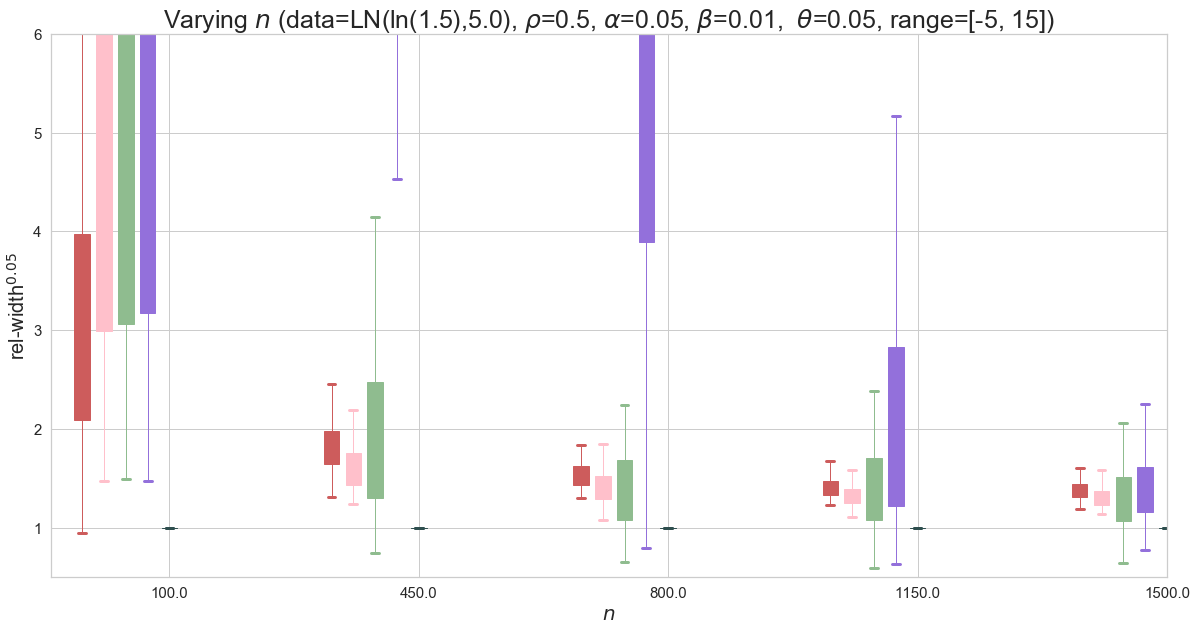

['Expmedian_naive', 'Expmedian', 'CDFmedian_naive', 'CDFmedian']
['ExpMechUnion', 'ExpMech', 'CDFPostProcessUnion', 'CDFPostProcess', 'Nonprivate']
../../figs/widths-n/rel-width-boxplots-95-lognormal_flat-naive-v-new-varying-n.pdf


FileNotFoundError: [Errno 2] No such file or directory: 'analysis/lognormal_flat_n_0_sizes_Expmedian_naive_n_0.npy'

In [223]:
imp.reload(run_cis)
imp.reload(analysis)

run_indices = [1, 3, 5, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [1, 3, 5, 7, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
print(alg_names)
alg_colors = [colors[i] for i in run_indices_names]
save=True
save_paths = width_save_paths(dir_path, dataset_name, param_string, alpha)
title = r"Varying $n$ (data=LN(ln(%.1f),%s), $\rho$=%s, $\alpha$=%.2f, $\beta$=%.2f,  $\theta$=%.2f, range=[%s, %s])" % (true_median, data_scale, rho, alpha, beta, granularity, range_center-range_scale, range_center+range_scale)
xlabel = r"$n$"

# save_path = save_paths[0]
# plt = analysis.plotCIs(algs, dataset_name, title, n, xlabel, alg_names,
#           param_string=param_string, ratio=True, line_plot=True, box_plot=False,
#           log=False, legend_out=False, xlim=None, sort='byParam', dataset_param=True, 
#           ylim=[0.5, 6],
#     save=save, save_path=save_path, colors=alg_colors)

# save_path = save_paths[1]
# plt = analysis.plotCIs(algs, dataset_name, title, n, xlabel, alg_names,
#           param_string=param_string, ratio=True, line_plot=False, box_plot=True,
#           ylim=[0.5,6],
#           log=False, legend_out=False, xlim=None, sort='byParam', dataset_param=True, 
#     save=save, save_path=save_path, colors=alg_colors)

# save_path = save_paths[2]
# plt = analysis.plotCIs(algs, dataset_name, title, n, xlabel, alg_names,
#           param_string=param_string, ratio=False, line_plot=True, box_plot=False,
#           log=False, legend_out=False, xlim=None, sort='byParam', dataset_param=True, 
#     save=save, save_path=save_path, colors=alg_colors)

# save_path = save_paths[3]
# plt = analysis.plotCIs(algs, dataset_name, title, n, xlabel, alg_names,
#           param_string=param_string, ratio=False, line_plot=False, box_plot=True,
#           log=False, legend_out=False, xlim=None, sort='byParam', dataset_param=True, 
#           ylim=[0, 3],
#     save=save, save_path=save_path, colors=alg_colors)

run_indices = [1, 3, 5, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [1, 3, 5, 7, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
print(alg_names)
alg_colors = [colors[i] for i in run_indices_names]
save=True

# save_path = save_paths[4]
# plt = analysis.plotCIs(algs, dataset_name, title, n, xlabel, alg_names,
#           param_string=param_string, ratio=True, line_plot=True, box_plot=False,
#           log=False, legend_out=False, xlim=None, sort='byParam', dataset_param=True, 
#           ylim=[0.5, 6], legend=False,
#     save=save, save_path=save_path, colors=alg_colors)

save_path = save_paths[5]
print(save_path)
plt = analysis.plotCIs(algs, dataset_name, title, n, xlabel, alg_names,
          param_string=param_string, ratio=True, line_plot=False, box_plot=True,
          ylim=[0.5,6], legend=False,
          log=False, legend_out=False, xlim=None, sort='byParam', dataset_param=True, 
    save=save, save_path=save_path, colors=alg_colors)

run_indices = [0, 1, 2, 3]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [0, 1, 2, 3, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
print(alg_names)
alg_colors = [colors[i] for i in run_indices_names]
save=True

save_path = save_paths[6]
print(save_path)
plt = analysis.plotCIs(algs, dataset_name, title, n, xlabel, alg_names,
          param_string=param_string, ratio=True, line_plot=False, box_plot=True,
          ylim=[0.5,6], legend=False,
          log=False, legend_out=False, xlim=None, sort='byParam', dataset_param=True, 
    save=save, save_path=save_path, colors=alg_colors)

# Width - varying data scale

In [214]:
num_trials = 5
range_center = 5
range_scale = 10
rho = 0.5
true_median = 1.5
alpha = 0.05
beta = 0.01
quantile = 0.5
granularity = 0.05
em_granularity = 0.005
num_datasets=100

dataset_name='lognormal_v2'
n = 1000
data_center = 0.5
data_scale = 1.0
true_median = st.lognorm.median(data_scale, loc=data_center)

param_string = 'data_scale'
num_params = 5
data_scale = np.logspace(-2, 0.5, num=num_params)
print(param_string, data_scale)

data_scale [0.01       0.04216965 0.17782794 0.74989421 3.16227766]


In [ ]:
imp.reload(run_cis)
imp.reload(wrap)

run_indices = [0,1]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_cis.runCIAlgs(dataset_name, num_datasets=num_datasets, num_trials=num_trials, num_params=num_params, 
                  param_string=param_string, 
                  rho=rho, range_center=range_center, range_scale=range_scale, 
                  alpha=alpha, beta=beta, quantile=quantile, 
                  n=n, granularity=granularity, em_granularity=em_granularity, true_median=true_median,
                  alg_list=algs, data_center=data_center, data_scale=data_scale, data_distribution='lognormal',
                  gen_data=True, rerun_algs=True, gen_preprocess=False)

['Expmedian_naive', 'Expmedian', 'CDFmedian_naive', 'CDFmedian', 'CDFBSmedian', 'AdaBSCDFmedian', 'BSmedian_sep_reuse_queries', 'AdaBSmedian_sep']
['ExpMechUnion', 'ExpMech', 'CDFPostProcessUnion', 'CDFPostProcess', 'CDF+BinSearch', 'BinSearch+CDF', 'BinSearch', 'NoisyBinSearch', 'Nonprivate']
['Expmedian', 'CDFmedian', 'AdaBSCDFmedian', 'AdaBSmedian_sep']
['ExpMech', 'CDFPostProcess', 'BinSearch+CDF', 'NoisyBinSearch', 'Nonprivate']
../../figs/widths-data_scale/rel-width-boxplots-95-lognormal_v2-varying-data_scale.pdf
0 ExpMech
[1.0, 9.0, 17.0, 25.0, 33.0]
1 CDFPostProcess
[1.7, 9.7, 17.7, 25.7, 33.7]
2 BinSearch+CDF
[2.4, 10.4, 18.4, 26.4, 34.4]
3 NoisyBinSearch
[3.0999999999999996, 11.1, 19.1, 27.1, 35.1]
4 Nonprivate
[3.8, 11.8, 19.8, 27.8, 35.8]


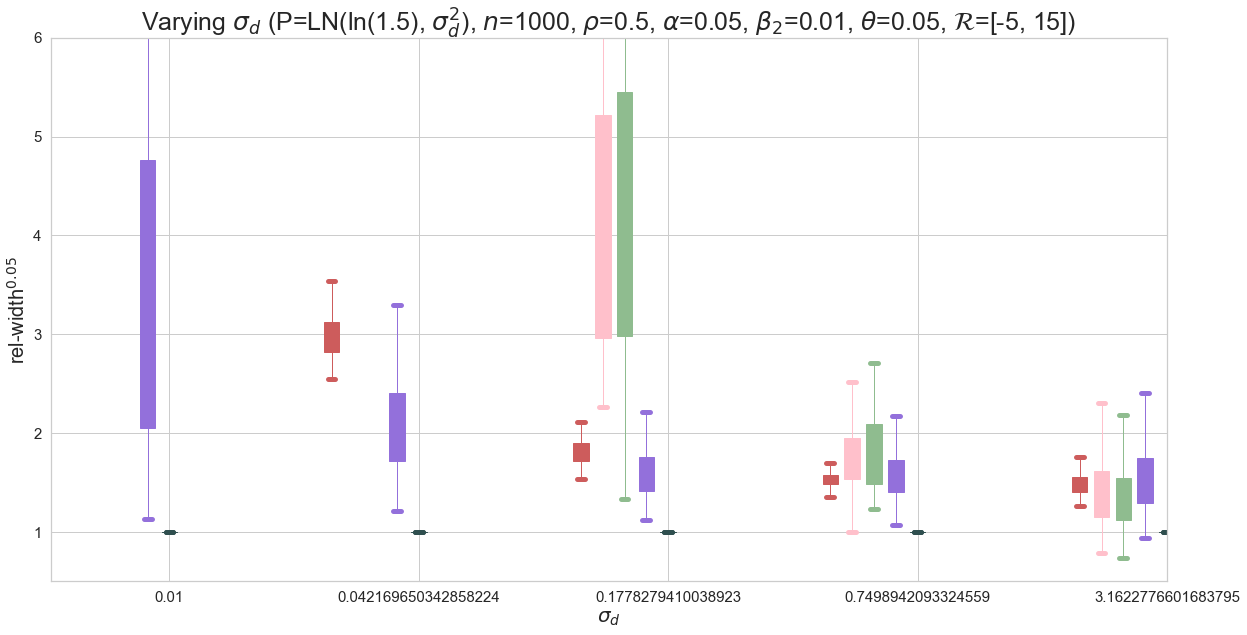

In [215]:
imp.reload(run_cis)
imp.reload(analysis)

run_indices = [0, 1, 2, 3, 4, 5, 6, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [0, 1, 2, 3, 4, 5, 6, 7, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
print(alg_names)
alg_colors = [colors[i] for i in run_indices_names]
save=True
save_paths = width_save_paths(dir_path, dataset_name, param_string, alpha)
title = r"Varying $\sigma_d$ (P=LN(ln(%.1f), $\sigma_d^2$), $n$=%s, $\rho$=%s, $\alpha$=%.2f, $\beta_2$=%.2f, $\theta$=%.2f, $\mathcal{R}$=[%s, %s])" % (true_median, n, rho, alpha, beta, granularity, range_center-range_scale, range_center+range_scale)
xlabel = r"$\sigma_d$"

# save_path = save_paths[0]
# plt = analysis.plotCIs(algs, dataset_name, title, data_scale, xlabel, alg_names,
#           param_string=param_string, ratio=True, line_plot=True, box_plot=False,
#           log=True, legend_out=False, xlim=None, sort='byParam', dataset_param=True, 
#           ylim=[0.5, 6], 
#     save=save, save_path=save_path, colors=alg_colors)

# save_path = save_paths[1]
# plt = analysis.plotCIs(algs, dataset_name, title, data_scale, xlabel, alg_names,
#           param_string=param_string, ratio=True, line_plot=False, box_plot=True,
#           ylim=[0.5,6], 
#           log=False, legend_out=False, xlim=None, sort='byParam', dataset_param=True, 
#     save=save, save_path=save_path, colors=alg_colors)

# save_path = save_paths[2]
# plt = analysis.plotCIs(algs, dataset_name, title, data_scale, xlabel, alg_names,
#           param_string=param_string, ratio=False, line_plot=True, box_plot=False,
#           log=True, legend_out=False, xlim=None, sort='byParam', dataset_param=True, 
#     save=save, save_path=save_path, colors=alg_colors)

# save_path = save_paths[3]
# plt = analysis.plotCIs(algs, dataset_name, title, data_scale, xlabel, alg_names,
#           param_string=param_string, ratio=False, line_plot=False, box_plot=True,
#           log=False, legend_out=False, xlim=None, sort='byParam', dataset_param=True, 
# #           ylim=[0, 2],
#     save=save, save_path=save_path, colors=alg_colors)


run_indices = [1, 3, 5, 7]
algs = [alg_index[i][0] for i in run_indices]
print(algs)
run_indices_names = [1, 3, 5, 7, 8]
alg_names = [alg_index[i][1] for i in run_indices_names]
print(alg_names)
alg_colors = [colors[i] for i in run_indices_names]
save=True

# save_path = save_paths[4]
# plt = analysis.plotCIs(algs, dataset_name, title, data_scale, xlabel, alg_names,
#           param_string=param_string, ratio=True, line_plot=True, box_plot=False,
#           log=True, legend_out=False, xlim=None, sort='byParam', dataset_param=True, 
#           ylim=[0.5, 6], legend=False,
#     save=save, save_path=save_path, colors=alg_colors)

save_path = save_paths[5]
print(save_path)
plt = analysis.plotCIs(algs, dataset_name, title, data_scale, xlabel, alg_names,
          param_string=param_string, ratio=True, line_plot=False, box_plot=True,
          ylim=[0.5,6], legend=False,
          log=False, legend_out=False, xlim=None, sort='byParam', dataset_param=True, 
    save=save, save_path=save_path, colors=alg_colors)